<a href="https://colab.research.google.com/github/LouMamalis/Quantifying-availability-of-surface-water-change-within-tropical-forests-in-Cambodia/blob/main/gi_nests_WaterDist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Colab notebook will compute and summarise the distance to water from Giant Ibis nests**

It starts with a data.frame of nest locations (removed from this dataset due to ethical considerations with sharing location data of a critically endangered bird species), year of nests and distances to water in each year from the Earth Engine code. This data was originally collected by the biodiversity team from the Wildlife Conservation Society Cambodia.

We summarise a histogram of distances for nests and background random points.

We analyse the maximum distance from water for active nests.

First read the data in as a csv from the data provided by WCS
This data is the nest data from 2003-present

In [ ]:
#read in the data nest data
system('gdown --id 1rDtaxvLV9gA_wpUuz-5OJwXibmOHq73k')  #this is the unique code to the relevant data

#this data has the calculations for the distance of the nest points to surface water
nests <- read.csv("nest_dists.csv", as.is = TRUE)

#data exploration
head(nests)
names(nests)

,system.index,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X79_cumulative_cost,X7_cumulative_cost,X80_cumulative_cost,X81_cumulative_cost,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Wildlife.Sanctuary,Year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,0.00000,0.00000,43.66487,122.70256,14.55496,204.52610,14.55496,0.00000,KPWS,2003
2,1,NA,NA,50.00536,0.00000,20.89948,NA,14.55294,14.55294,14.55294,⋯,79.11125,80.89950,15.00000,43.65883,122.69835,134.49745,14.55294,43.65883,KPWS,2003
3,2,NA,NA,0.00000,14.55775,45.00000,NA,0.00000,80.90280,0.00000,⋯,14.55775,0.00000,43.67325,14.55775,20.90283,62.70849,0.00000,NA,KPWS,2003
4,3,NA,NA,14.55513,0.00000,104.50504,NA,45.00000,20.90100,0.00000,⋯,92.70302,75.00000,20.90100,15.00000,122.70303,45.00000,0.00000,0.00000,KPWS,2003
5,4,NA,NA,14.55853,0.00000,0.00000,NA,45.00000,0.00000,0.00000,⋯,45.00000,14.55853,14.55853,152.71016,NA,20.90337,0.00000,NA,KPWS,2004
6,5,NA,NA,14.55853,50.02044,43.67560,NA,0.00000,50.02044,14.55853,⋯,188.13052,NA,15.00000,15.00000,NA,50.02044,14.55853,NA,KPWS,2004


[1] "system.index"        "X0_cumulative_cost"  "X10_cumulative_cost"
 [4] "X11_cumulative_cost" "X12_cumulative_cost" "X13_cumulative_cost"
 [7] "X14_cumulative_cost" "X15_cumulative_cost" "X16_cumulative_cost"
[10] "X17_cumulative_cost" "X18_cumulative_cost" "X19_cumulative_cost"
[13] "X1_cumulative_cost"  "X20_cumulative_cost" "X21_cumulative_cost"
[16] "X22_cumulative_cost" "X23_cumulative_cost" "X24_cumulative_cost"
[19] "X25_cumulative_cost" "X26_cumulative_cost" "X27_cumulative_cost"
[22] "X28_cumulative_cost" "X29_cumulative_cost" "X2_cumulative_cost" 
[25] "X30_cumulative_cost" "X31_cumulative_cost" "X32_cumulative_cost"
[28] "X33_cumulative_cost" "X34_cumulative_cost" "X35_cumulative_cost"
[31] "X36_cumulative_cost" "X37_cumulative_cost" "X38_cumulative_cost"
[34] "X39_cumulative_cost" "X3_cumulative_cost"  "X40_cumulative_cost"
[37] "X41_cumulative_cost" "X42_cumulative_cost" "X43_cumulative_cost"
[40] "X44_cumulative_cost" "X45_cumulative_cost" "X46_cumulative_cost"
[43] "X47_cumulative_cost" "X48_cumulative_cost" "X49_cumulative_cost"
[46] "X4_cumulative_cost"  "X50_cumulative_cost" "X51_cumulative_cost"
[49] "X52_cumulative_cost" "X53_cumulative_cost" "X54_cumulative_cost"
[52] "X55_cumulative_cost" "X56_cumulative_cost" "X57_cumulative_cost"
[55] "X58_cumulative_cost" "X59_cumulative_cost" "X5_cumulative_cost" 
[58] "X60_cumulative_cost" "X61_cumulative_cost" "X62_cumulative_cost"
[61] "X63_cumulative_cost" "X64_cumulative_cost" "X65_cumulative_cost"
[64] "X66_cumulative_cost" "X67_cumulative_cost" "X68_cumulative_cost"
[67] "X69_cumulative_cost" "X6_cumulative_cost"  "X70_cumulative_cost"
[70] "X71_cumulative_cost" "X72_cumulative_cost" "X73_cumulative_cost"
[73] "X74_cumulative_cost" "X75_cumulative_cost" "X76_cumulative_cost"
[76] "X77_cumulative_cost" "X78_cumulative_cost" "X79_cumulative_cost"
[79] "X7_cumulative_cost"  "X80_cumulative_cost" "X81_cumulative_cost"
[82] "X82_cumulative_cost" "X83_cumulative_cost" "X8_cumulative_cost" 
[85] "X9_cumulative_cost"  "Wildlife.Sanctuary"  "Year"

Add a column (nest) to the nest dataframe to distinguish between those points that are nests and random points
yes = nest
no = random point


In [ ]:
nests$nest <- "yes"
colnames(nests)
class(nests$Year)

[1] "system.index"        "X0_cumulative_cost"  "X10_cumulative_cost"
 [4] "X11_cumulative_cost" "X12_cumulative_cost" "X13_cumulative_cost"
 [7] "X14_cumulative_cost" "X15_cumulative_cost" "X16_cumulative_cost"
[10] "X17_cumulative_cost" "X18_cumulative_cost" "X19_cumulative_cost"
[13] "X1_cumulative_cost"  "X20_cumulative_cost" "X21_cumulative_cost"
[16] "X22_cumulative_cost" "X23_cumulative_cost" "X24_cumulative_cost"
[19] "X25_cumulative_cost" "X26_cumulative_cost" "X27_cumulative_cost"
[22] "X28_cumulative_cost" "X29_cumulative_cost" "X2_cumulative_cost" 
[25] "X30_cumulative_cost" "X31_cumulative_cost" "X32_cumulative_cost"
[28] "X33_cumulative_cost" "X34_cumulative_cost" "X35_cumulative_cost"
[31] "X36_cumulative_cost" "X37_cumulative_cost" "X38_cumulative_cost"
[34] "X39_cumulative_cost" "X3_cumulative_cost"  "X40_cumulative_cost"
[37] "X41_cumulative_cost" "X42_cumulative_cost" "X43_cumulative_cost"
[40] "X44_cumulative_cost" "X45_cumulative_cost" "X46_cumulative_cost"
[43] "X47_cumulative_cost" "X48_cumulative_cost" "X49_cumulative_cost"
[46] "X4_cumulative_cost"  "X50_cumulative_cost" "X51_cumulative_cost"
[49] "X52_cumulative_cost" "X53_cumulative_cost" "X54_cumulative_cost"
[52] "X55_cumulative_cost" "X56_cumulative_cost" "X57_cumulative_cost"
[55] "X58_cumulative_cost" "X59_cumulative_cost" "X5_cumulative_cost" 
[58] "X60_cumulative_cost" "X61_cumulative_cost" "X62_cumulative_cost"
[61] "X63_cumulative_cost" "X64_cumulative_cost" "X65_cumulative_cost"
[64] "X66_cumulative_cost" "X67_cumulative_cost" "X68_cumulative_cost"
[67] "X69_cumulative_cost" "X6_cumulative_cost"  "X70_cumulative_cost"
[70] "X71_cumulative_cost" "X72_cumulative_cost" "X73_cumulative_cost"
[73] "X74_cumulative_cost" "X75_cumulative_cost" "X76_cumulative_cost"
[76] "X77_cumulative_cost" "X78_cumulative_cost" "X79_cumulative_cost"
[79] "X7_cumulative_cost"  "X80_cumulative_cost" "X81_cumulative_cost"
[82] "X82_cumulative_cost" "X83_cumulative_cost" "X8_cumulative_cost" 
[85] "X9_cumulative_cost"  "Wildlife.Sanctuary"  "Year"               
[88] "nest"

[1] "character"

Read in the randomly generated points from CWS and KPWS from GEE - randomly generated over KPWS and CWS

***note to self***
When you are reading in files from your google docs make sure you remember to change the share settings to 'share with anyone with this link'


In [ ]:
system('gdown --id 1z1ClU8cKG0Y_DbLqLTogQ-jUhNZb9atg')  # replace this code with the unique link from your google drive file

random <- read.csv("random_dists.csv", as.is = TRUE)

head(random)


,system.index,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X78_cumulative_cost,X79_cumulative_cost,X7_cumulative_cost,X80_cumulative_cost,X81_cumulative_cost,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,.geo
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,NA,NA,14.55622,0.00000,50.01420,NA,50.90175,0.00,20.90176,⋯,0.0000,137.35151,72.78110,14.55622,92.70523,NA,62.70529,0.00000,14.55622,"{""type"":""Point"",""coordinates"":[105.12190522725676,13.971915365464001]}"
2,1,NA,NA,15.00000,43.65184,49.99909,NA,110.89782,15.00,15.00000,⋯,NA,20.89786,0.00000,43.65184,334.66414,20.89786,319.87675,20.89786,20.89786,"{""type"":""Point"",""coordinates"":[104.93853626157595,14.060215632664768]}"
3,2,104.53521,0,0.00000,176.34917,346.48715,NA,20.90705,108.29,91.84880,⋯,NA,50.90704,20.90705,50.90704,80.90703,15.00000,80.90708,50.03469,14.56382,"{""type"":""Point"",""coordinates"":[104.81028732598473,13.85095784490326]}"
4,3,NA,NA,0.00000,0.00000,15.00000,NA,15.00000,0.00,0.00000,⋯,0.0000,79.15232,15.00000,0.00000,14.56169,15.00000,131.05519,0.00000,0.00000,"{""type"":""Point"",""coordinates"":[105.34386782439006,13.884982572388948]}"
5,4,91.80971,NA,0.00000,79.11743,79.11743,0,0.00000,0.00,14.55426,⋯,146.3029,0.00000,0.00000,146.30265,224.66001,NA,0.00000,0.00000,0.00000,"{""type"":""Point"",""coordinates"":[105.30907433952788,14.002755816131485]}"
6,5,266.58498,NA,20.90577,50.90578,495.82790,NA,20.90577,0.00,206.34051,⋯,NA,0.00000,NA,14.56198,0.00000,NA,50.02972,110.90580,175.46412,"{""type"":""Point"",""coordinates"":[105.04479337336277,13.880416091249312]}"


Create a new column (nest) in df called random that states that all of these points are not nests - using 'no'.
We have allocated a random year to each of the random points which will enabling matching of nest and non-nest points for the different years.

In [ ]:
random$nest <- "no"
random$Year <- sample(2003:2020, NROW(random), replace = TRUE)
colnames(random)
class(random$Year)

[1] "system.index"        "X0_cumulative_cost"  "X10_cumulative_cost"
 [4] "X11_cumulative_cost" "X12_cumulative_cost" "X13_cumulative_cost"
 [7] "X14_cumulative_cost" "X15_cumulative_cost" "X16_cumulative_cost"
[10] "X17_cumulative_cost" "X18_cumulative_cost" "X19_cumulative_cost"
[13] "X1_cumulative_cost"  "X20_cumulative_cost" "X21_cumulative_cost"
[16] "X22_cumulative_cost" "X23_cumulative_cost" "X24_cumulative_cost"
[19] "X25_cumulative_cost" "X26_cumulative_cost" "X27_cumulative_cost"
[22] "X28_cumulative_cost" "X29_cumulative_cost" "X2_cumulative_cost" 
[25] "X30_cumulative_cost" "X31_cumulative_cost" "X32_cumulative_cost"
[28] "X33_cumulative_cost" "X34_cumulative_cost" "X35_cumulative_cost"
[31] "X36_cumulative_cost" "X37_cumulative_cost" "X38_cumulative_cost"
[34] "X39_cumulative_cost" "X3_cumulative_cost"  "X40_cumulative_cost"
[37] "X41_cumulative_cost" "X42_cumulative_cost" "X43_cumulative_cost"
[40] "X44_cumulative_cost" "X45_cumulative_cost" "X46_cumulative_cost"
[43] "X47_cumulative_cost" "X48_cumulative_cost" "X49_cumulative_cost"
[46] "X4_cumulative_cost"  "X50_cumulative_cost" "X51_cumulative_cost"
[49] "X52_cumulative_cost" "X53_cumulative_cost" "X54_cumulative_cost"
[52] "X55_cumulative_cost" "X56_cumulative_cost" "X57_cumulative_cost"
[55] "X58_cumulative_cost" "X59_cumulative_cost" "X5_cumulative_cost" 
[58] "X60_cumulative_cost" "X61_cumulative_cost" "X62_cumulative_cost"
[61] "X63_cumulative_cost" "X64_cumulative_cost" "X65_cumulative_cost"
[64] "X66_cumulative_cost" "X67_cumulative_cost" "X68_cumulative_cost"
[67] "X69_cumulative_cost" "X6_cumulative_cost"  "X70_cumulative_cost"
[70] "X71_cumulative_cost" "X72_cumulative_cost" "X73_cumulative_cost"
[73] "X74_cumulative_cost" "X75_cumulative_cost" "X76_cumulative_cost"
[76] "X77_cumulative_cost" "X78_cumulative_cost" "X79_cumulative_cost"
[79] "X7_cumulative_cost"  "X80_cumulative_cost" "X81_cumulative_cost"
[82] "X82_cumulative_cost" "X83_cumulative_cost" "X8_cumulative_cost" 
[85] "X9_cumulative_cost"  ".geo"                "nest"               
[88] "Year"

[1] "integer"

Convert year column from an integer to a character

In [ ]:
random$Year <- as.character(random$Year)
class(random$Year)

[1] "character"

Used a full_join to join the two dataframes of nests and non nest points together into one single dataframe
This creates a new dataframe called all_points

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
all_points <- nests %>%
    full_join(random, by = c("nest", "X0_cumulative_cost","X10_cumulative_cost",
    "X11_cumulative_cost", "X12_cumulative_cost", "X13_cumulative_cost", "X14_cumulative_cost", "X15_cumulative_cost", "X16_cumulative_cost",
    "X17_cumulative_cost", "X18_cumulative_cost", "X19_cumulative_cost", "X1_cumulative_cost", "X20_cumulative_cost", "X21_cumulative_cost",
    "X22_cumulative_cost", "X23_cumulative_cost", "X24_cumulative_cost", "X25_cumulative_cost", "X26_cumulative_cost", "X27_cumulative_cost",
    "X28_cumulative_cost", "X29_cumulative_cost", "X2_cumulative_cost", "X30_cumulative_cost", "X31_cumulative_cost", "X32_cumulative_cost",
    "X33_cumulative_cost", "X34_cumulative_cost", "X35_cumulative_cost", "X36_cumulative_cost", "X37_cumulative_cost", "X38_cumulative_cost",
    "X39_cumulative_cost", "X3_cumulative_cost", "X40_cumulative_cost", "X41_cumulative_cost", "X42_cumulative_cost", "X43_cumulative_cost",
    "X44_cumulative_cost", "X45_cumulative_cost", "X46_cumulative_cost", "X47_cumulative_cost", "X48_cumulative_cost", "X49_cumulative_cost",
    "X4_cumulative_cost", "X50_cumulative_cost", "X51_cumulative_cost", "X52_cumulative_cost", "X53_cumulative_cost", "X54_cumulative_cost",
    "X55_cumulative_cost", "X56_cumulative_cost", "X57_cumulative_cost", "X58_cumulative_cost", "X59_cumulative_cost", "X5_cumulative_cost",
    "X60_cumulative_cost", "X61_cumulative_cost", "X62_cumulative_cost", "X63_cumulative_cost", "X64_cumulative_cost", "X65_cumulative_cost",
    "X66_cumulative_cost", "X67_cumulative_cost", "X68_cumulative_cost", "X69_cumulative_cost", "X6_cumulative_cost", "X70_cumulative_cost",
    "X71_cumulative_cost", "X72_cumulative_cost", "X73_cumulative_cost", "X74_cumulative_cost", "X75_cumulative_cost", "X76_cumulative_cost",
    "X77_cumulative_cost", "X78_cumulative_cost", "X79_cumulative_cost", "X7_cumulative_cost", "X80_cumulative_cost", "X81_cumulative_cost",
    "X82_cumulative_cost", "X83_cumulative_cost", "X8_cumulative_cost", "X9_cumulative_cost", "Year")) %>%
    select(nest, X0_cumulative_cost, X0_cumulative_cost, X10_cumulative_cost, X11_cumulative_cost, X12_cumulative_cost, X13_cumulative_cost,
    X14_cumulative_cost, X15_cumulative_cost, X16_cumulative_cost, X17_cumulative_cost, X18_cumulative_cost, X19_cumulative_cost, X1_cumulative_cost,
    X20_cumulative_cost, X21_cumulative_cost, X22_cumulative_cost, X23_cumulative_cost, X24_cumulative_cost, X25_cumulative_cost, X26_cumulative_cost,
    X27_cumulative_cost, X28_cumulative_cost, X29_cumulative_cost, X2_cumulative_cost, X30_cumulative_cost, X31_cumulative_cost, X32_cumulative_cost,
    X33_cumulative_cost, X34_cumulative_cost, X35_cumulative_cost, X36_cumulative_cost, X37_cumulative_cost, X38_cumulative_cost, X39_cumulative_cost,
    X3_cumulative_cost, X40_cumulative_cost, X41_cumulative_cost, X42_cumulative_cost, X43_cumulative_cost, X44_cumulative_cost, X45_cumulative_cost,
    X46_cumulative_cost, X47_cumulative_cost, X48_cumulative_cost, X49_cumulative_cost, X4_cumulative_cost, X50_cumulative_cost, X51_cumulative_cost,
    X52_cumulative_cost, X53_cumulative_cost, X54_cumulative_cost, X55_cumulative_cost, X56_cumulative_cost, X57_cumulative_cost, X58_cumulative_cost,
    X59_cumulative_cost, X5_cumulative_cost, X60_cumulative_cost, X61_cumulative_cost, X62_cumulative_cost, X63_cumulative_cost, X64_cumulative_cost,
    X65_cumulative_cost, X66_cumulative_cost, X67_cumulative_cost, X68_cumulative_cost, X69_cumulative_cost, X6_cumulative_cost, X70_cumulative_cost,
    X71_cumulative_cost, X72_cumulative_cost, X73_cumulative_cost, X74_cumulative_cost, X75_cumulative_cost, X76_cumulative_cost, X77_cumulative_cost,
    X78_cumulative_cost, X79_cumulative_cost, X7_cumulative_cost, X80_cumulative_cost, X81_cumulative_cost, X82_cumulative_cost, X83_cumulative_cost,
    X8_cumulative_cost, X9_cumulative_cost, Year, everything())
all_points

nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X81_cumulative_cost,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,122.70256,14.55496,204.52610,14.55496,0.00000,2003,0,KPWS,NA,NA
yes,NA,NA,50.00536,0.00000,20.89948,NA,14.55294,14.55294,14.55294,⋯,43.65883,122.69835,134.49745,14.55294,43.65883,2003,1,KPWS,NA,NA
yes,NA,NA,0.00000,14.55775,45.00000,NA,0.00000,80.90280,0.00000,⋯,14.55775,20.90283,62.70849,0.00000,NA,2003,2,KPWS,NA,NA
yes,NA,NA,14.55513,0.00000,104.50504,NA,45.00000,20.90100,0.00000,⋯,15.00000,122.70303,45.00000,0.00000,0.00000,2003,3,KPWS,NA,NA
yes,NA,NA,14.55853,0.00000,0.00000,NA,45.00000,0.00000,0.00000,⋯,152.71016,NA,20.90337,0.00000,NA,2004,4,KPWS,NA,NA
yes,NA,NA,14.55853,50.02044,43.67560,NA,0.00000,50.02044,14.55853,⋯,15.00000,NA,50.02044,14.55853,NA,2004,5,KPWS,NA,NA
yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,122.70256,14.55496,204.52610,14.55496,0.00000,2004,6,KPWS,NA,NA
yes,NA,NA,15.00000,43.66457,224.66879,NA,0.00000,146.30577,15.00000,⋯,NA,170.90087,220.94257,0.00000,0.00000,2004,7,KPWS,NA,NA
yes,NA,NA,0.00000,0.00000,92.70470,NA,0.00000,0.00000,14.55596,⋯,350.09374,20.90158,15.00000,14.55596,NA,2004,8,KPWS,NA,NA


Check the col names, number of rows and cols that merge has occured correctly.


In [ ]:
colnames(all_points)
nrow(all_points)
ncol(all_points)
head(all_points)

[1] "nest"                "X0_cumulative_cost"  "X10_cumulative_cost"
 [4] "X11_cumulative_cost" "X12_cumulative_cost" "X13_cumulative_cost"
 [7] "X14_cumulative_cost" "X15_cumulative_cost" "X16_cumulative_cost"
[10] "X17_cumulative_cost" "X18_cumulative_cost" "X19_cumulative_cost"
[13] "X1_cumulative_cost"  "X20_cumulative_cost" "X21_cumulative_cost"
[16] "X22_cumulative_cost" "X23_cumulative_cost" "X24_cumulative_cost"
[19] "X25_cumulative_cost" "X26_cumulative_cost" "X27_cumulative_cost"
[22] "X28_cumulative_cost" "X29_cumulative_cost" "X2_cumulative_cost" 
[25] "X30_cumulative_cost" "X31_cumulative_cost" "X32_cumulative_cost"
[28] "X33_cumulative_cost" "X34_cumulative_cost" "X35_cumulative_cost"
[31] "X36_cumulative_cost" "X37_cumulative_cost" "X38_cumulative_cost"
[34] "X39_cumulative_cost" "X3_cumulative_cost"  "X40_cumulative_cost"
[37] "X41_cumulative_cost" "X42_cumulative_cost" "X43_cumulative_cost"
[40] "X44_cumulative_cost" "X45_cumulative_cost" "X46_cumulative_cost"
[43] "X47_cumulative_cost" "X48_cumulative_cost" "X49_cumulative_cost"
[46] "X4_cumulative_cost"  "X50_cumulative_cost" "X51_cumulative_cost"
[49] "X52_cumulative_cost" "X53_cumulative_cost" "X54_cumulative_cost"
[52] "X55_cumulative_cost" "X56_cumulative_cost" "X57_cumulative_cost"
[55] "X58_cumulative_cost" "X59_cumulative_cost" "X5_cumulative_cost" 
[58] "X60_cumulative_cost" "X61_cumulative_cost" "X62_cumulative_cost"
[61] "X63_cumulative_cost" "X64_cumulative_cost" "X65_cumulative_cost"
[64] "X66_cumulative_cost" "X67_cumulative_cost" "X68_cumulative_cost"
[67] "X69_cumulative_cost" "X6_cumulative_cost"  "X70_cumulative_cost"
[70] "X71_cumulative_cost" "X72_cumulative_cost" "X73_cumulative_cost"
[73] "X74_cumulative_cost" "X75_cumulative_cost" "X76_cumulative_cost"
[76] "X77_cumulative_cost" "X78_cumulative_cost" "X79_cumulative_cost"
[79] "X7_cumulative_cost"  "X80_cumulative_cost" "X81_cumulative_cost"
[82] "X82_cumulative_cost" "X83_cumulative_cost" "X8_cumulative_cost" 
[85] "X9_cumulative_cost"  "Year"                "system.index.x"     
[88] "Wildlife.Sanctuary"  "system.index.y"      ".geo"

[1] 1440

[1] 90

,nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X81_cumulative_cost,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,122.70256,14.55496,204.52610,14.55496,0.00000,2003,0,KPWS,NA,NA
2,yes,NA,NA,50.00536,0.00000,20.89948,NA,14.55294,14.55294,14.55294,⋯,43.65883,122.69835,134.49745,14.55294,43.65883,2003,1,KPWS,NA,NA
3,yes,NA,NA,0.00000,14.55775,45.00000,NA,0.00000,80.90280,0.00000,⋯,14.55775,20.90283,62.70849,0.00000,NA,2003,2,KPWS,NA,NA
4,yes,NA,NA,14.55513,0.00000,104.50504,NA,45.00000,20.90100,0.00000,⋯,15.00000,122.70303,45.00000,0.00000,0.00000,2003,3,KPWS,NA,NA
5,yes,NA,NA,14.55853,0.00000,0.00000,NA,45.00000,0.00000,0.00000,⋯,152.71016,NA,20.90337,0.00000,NA,2004,4,KPWS,NA,NA
6,yes,NA,NA,14.55853,50.02044,43.67560,NA,0.00000,50.02044,14.55853,⋯,15.00000,NA,50.02044,14.55853,NA,2004,5,KPWS,NA,NA


Need to identify the columns of the nests data.frame that are relevant for each year. This requires string manipulation to tidy up the column names, then knowing the codes for the numbers that link to the years. IIRC layers 0, 1, 2, 3 should be quarters 1, 2, 3 & 4 in the year 2000, respectively? If so we need the following look up table:

In [ ]:
lookup <- data.frame(GE_index = 0:(NROW(rep(2000:2020, each = 4))-1),
                     year = rep(2000:2020, each = 4),
                     col_name = paste0("X", 0:(NROW(rep(2000:2020, each = 4))-1),
                                       "_cumulative_cost"))

head(lookup)

,GE_index,year,col_name
,<int>,<int>,<chr>
1,0,2000,X0_cumulative_cost
2,1,2000,X1_cumulative_cost
3,2,2000,X2_cumulative_cost
4,3,2000,X3_cumulative_cost
5,4,2001,X4_cumulative_cost
6,5,2001,X5_cumulative_cost


Now add the column choosing the correct year of water distance, and fill it appropriately:

In [ ]:
colnames(all_points)

[1] "nest"                "X0_cumulative_cost"  "X10_cumulative_cost"
 [4] "X11_cumulative_cost" "X12_cumulative_cost" "X13_cumulative_cost"
 [7] "X14_cumulative_cost" "X15_cumulative_cost" "X16_cumulative_cost"
[10] "X17_cumulative_cost" "X18_cumulative_cost" "X19_cumulative_cost"
[13] "X1_cumulative_cost"  "X20_cumulative_cost" "X21_cumulative_cost"
[16] "X22_cumulative_cost" "X23_cumulative_cost" "X24_cumulative_cost"
[19] "X25_cumulative_cost" "X26_cumulative_cost" "X27_cumulative_cost"
[22] "X28_cumulative_cost" "X29_cumulative_cost" "X2_cumulative_cost" 
[25] "X30_cumulative_cost" "X31_cumulative_cost" "X32_cumulative_cost"
[28] "X33_cumulative_cost" "X34_cumulative_cost" "X35_cumulative_cost"
[31] "X36_cumulative_cost" "X37_cumulative_cost" "X38_cumulative_cost"
[34] "X39_cumulative_cost" "X3_cumulative_cost"  "X40_cumulative_cost"
[37] "X41_cumulative_cost" "X42_cumulative_cost" "X43_cumulative_cost"
[40] "X44_cumulative_cost" "X45_cumulative_cost" "X46_cumulative_cost"
[43] "X47_cumulative_cost" "X48_cumulative_cost" "X49_cumulative_cost"
[46] "X4_cumulative_cost"  "X50_cumulative_cost" "X51_cumulative_cost"
[49] "X52_cumulative_cost" "X53_cumulative_cost" "X54_cumulative_cost"
[52] "X55_cumulative_cost" "X56_cumulative_cost" "X57_cumulative_cost"
[55] "X58_cumulative_cost" "X59_cumulative_cost" "X5_cumulative_cost" 
[58] "X60_cumulative_cost" "X61_cumulative_cost" "X62_cumulative_cost"
[61] "X63_cumulative_cost" "X64_cumulative_cost" "X65_cumulative_cost"
[64] "X66_cumulative_cost" "X67_cumulative_cost" "X68_cumulative_cost"
[67] "X69_cumulative_cost" "X6_cumulative_cost"  "X70_cumulative_cost"
[70] "X71_cumulative_cost" "X72_cumulative_cost" "X73_cumulative_cost"
[73] "X74_cumulative_cost" "X75_cumulative_cost" "X76_cumulative_cost"
[76] "X77_cumulative_cost" "X78_cumulative_cost" "X79_cumulative_cost"
[79] "X7_cumulative_cost"  "X80_cumulative_cost" "X81_cumulative_cost"
[82] "X82_cumulative_cost" "X83_cumulative_cost" "X8_cumulative_cost" 
[85] "X9_cumulative_cost"  "Year"                "system.index.x"     
[88] "Wildlife.Sanctuary"  "system.index.y"      ".geo"

In [ ]:
all_points

nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X81_cumulative_cost,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,122.70256,14.55496,204.52610,14.55496,0.00000,2003,0,KPWS,NA,NA
yes,NA,NA,50.00536,0.00000,20.89948,NA,14.55294,14.55294,14.55294,⋯,43.65883,122.69835,134.49745,14.55294,43.65883,2003,1,KPWS,NA,NA
yes,NA,NA,0.00000,14.55775,45.00000,NA,0.00000,80.90280,0.00000,⋯,14.55775,20.90283,62.70849,0.00000,NA,2003,2,KPWS,NA,NA
yes,NA,NA,14.55513,0.00000,104.50504,NA,45.00000,20.90100,0.00000,⋯,15.00000,122.70303,45.00000,0.00000,0.00000,2003,3,KPWS,NA,NA
yes,NA,NA,14.55853,0.00000,0.00000,NA,45.00000,0.00000,0.00000,⋯,152.71016,NA,20.90337,0.00000,NA,2004,4,KPWS,NA,NA
yes,NA,NA,14.55853,50.02044,43.67560,NA,0.00000,50.02044,14.55853,⋯,15.00000,NA,50.02044,14.55853,NA,2004,5,KPWS,NA,NA
yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,122.70256,14.55496,204.52610,14.55496,0.00000,2004,6,KPWS,NA,NA
yes,NA,NA,15.00000,43.66457,224.66879,NA,0.00000,146.30577,15.00000,⋯,NA,170.90087,220.94257,0.00000,0.00000,2004,7,KPWS,NA,NA
yes,NA,NA,0.00000,0.00000,92.70470,NA,0.00000,0.00000,14.55596,⋯,350.09374,20.90158,15.00000,14.55596,NA,2004,8,KPWS,NA,NA


Now we want to select the same number (or a fair multiple of the same number) of random points in each year. First, find the number of nests in each year: here we have also managed to remove/edit those nests that were labeled as 2018-2019 now as 2018.
the first line here removes the 2018-2019 in all_points and the line below removes the same within the nests object. (the all_points removal was missing at first)

In [ ]:
all_points$Year <- as.numeric(substr(all_points$Year, 1, 4))
nests$Year <- as.numeric(substr(nests$Year, 1, 4))
nests_per_year <- table(nests$Year)
nests_per_year


2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
   4   41   27   28   32   17   41   19   31   18   26   24   18   17   26   31 
2019 2020 2021 
  21   17    2 

Now sample the random data to match this year pattern (twice here): (previously we'd allocated random years to random points, but now we're balancing the design a bit). We are aiming for same balance of random points as nest points per year

In [ ]:
dummy_nests <- all_points[all_points$nest == 'no',]
dummy_nests$Year[1:(2 * sum(nests_per_year))] <- rep(as.numeric(names(nests_per_year)), times = nests_per_year)
dummy_nests <- dummy_nests[1:(2 * sum(nests_per_year)),]
dummy_nests_per_year <- table(dummy_nests$Year)
dummy_nests_per_year


2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
   8   82   54   56   64   34   82   38   62   36   52   48   36   34   52   62 
2019 2020 2021 
  42   34    4 

And now join this to the actual nests and then remove 2021 data because there's no water data. Now we also have just 438 nest points as we have excluded the two nests from 2021 we have double that of random points

We have created a df of all the data together:

In [ ]:
all_points <- all_points[all_points$nest == 'yes',]

all_points <- rbind(all_points, dummy_nests)
all_points <- all_points[all_points$Year < 2021,]
dim(all_points)
table(all_points$nest)

[1] 1314   90


 no yes 
876 438 

Checking the missing year - this chunk of code is just to make checks on the data

In [ ]:
all_points$Year[1:400]
table(is.na(all_points$Year))
nrow(all_points)

#select rows with empty cells
#rows_with_empty_cells <- all_points[apply(data == "", 1, any), ]

#print the selected rows
#print(rows_with_empty_cells[1:4])

[1] 2003 2003 2003 2003 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [16] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2005 2005 2005 2005 2005
 [31] 2005 2005 2005 2006 2006 2006 2006 2006 2006 2006 2006 2006 2007 2007 2007
 [46] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2008 2008 2008 2008 2008
 [61] 2008 2008 2008 2008 2008 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 [76] 2009 2009 2009 2009 2009 2009 2009 2009 2010 2010 2010 2010 2010 2010 2010
 [91] 2010 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2012 2012 2012
[106] 2012 2012 2012 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 2014
[121] 2014 2014 2014 2014 2014 2014 2014 2015 2015 2015 2015 2015 2015 2016 2016
[136] 2016 2016 2016 2017 2017 2017 2017 2017 2017 2017 2017 2017 2018 2018 2018
[151] 2018 2018 2018 2018 2018 2019 2019 2019 2019 2019 2020 2020 2020 2020 2020
[166] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
[181] 2004 2004 2004 2004 2004 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
[196] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2006 2006 2006 2006 2006 2006
[211] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2007 2007
[226] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007
[241] 2007 2007 2008 2008 2008 2008 2008 2008 2008 2009 2009 2009 2009 2009 2009
[256] 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
[271] 2009 2009 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 2011 2011
[286] 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011
[301] 2011 2011 2011 2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 2012
[316] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013
[331] 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014
[346] 2014 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2016 2016
[361] 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2017 2017 2017 2017 2017
[376] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2018 2018 2018
[391] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018


FALSE 
 1314 

[1] 1314

And created another df for the dry season:

In [ ]:
all_points_ds <- all_points[all_points$nest == 'yes',]
dim(all_points_ds)
all_points_ds <- rbind(all_points_ds, dummy_nests)
all_points_ds <- all_points_ds[all_points_ds$Year < 2021,]
dim(all_points_ds)
table(all_points_ds$nest)

[1] 438  90

[1] 1314   90


 no yes 
876 438 

Here we are looking at the distance to water over all the months in the year for the wet season

In [ ]:
all_points$water_dist <- NA                                                          # Makes the water_dist column

for(i in 1:NROW(all_points)){                                                        # Loops through each nest to extract the correct water distance
  water_dists <- all_points[i, lookup[lookup$year == all_points[i,"Year"], "col_name"]]        # extracts the distances for the 4 quarters of the relevant year
  all_points$water_dist[i] <- min(unname(unlist(water_dists)), na.rm = TRUE)
}

all_points$water_dist       # Worth thinking about why there are so many NAs here.

Warning message in min(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”


[1]   0.00000   0.00000   0.00000   0.00000   0.00000  14.55853   0.00000
   [8]   0.00000   0.00000   0.00000   0.00000  14.55294   0.00000   0.00000
  [15]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  [22]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  20.90333
  [29]   0.00000  15.00000  20.90390   0.00000   0.00000   0.00000   0.00000
  [36]   0.00000   0.00000   0.00000   0.00000   0.00000  15.00000   0.00000
  [43]  14.55816   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  [50]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  [57]   0.00000   0.00000   0.00000   0.00000  20.89958   0.00000  14.55775
  [64]   0.00000   0.00000  14.54852   0.00000   0.00000   0.00000   0.00000
  [71]   0.00000   0.00000   0.00000   0.00000  14.55573   0.00000   0.00000
  [78]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  [85]   0.00000   0.00000   0.00000  20.90551  15.00000  15.00000  14.54778
  [92]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
  [99]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [106]   0.00000  14.56160   0.00000  20.89936   0.00000   0.00000  14.55710
 [113]  20.90336   0.00000   0.00000   0.00000   0.00000  14.56463   0.00000
 [120]   0.00000   0.00000   0.00000   0.00000  14.55581   0.00000   0.00000
 [127]  14.55989  14.55535   0.00000  14.55375   0.00000   0.00000  20.90115
 [134]   0.00000   0.00000   0.00000  14.55260   0.00000  14.55264   0.00000
 [141]   0.00000   0.00000  15.00000  15.00000   0.00000  14.54553   0.00000
 [148]   0.00000   0.00000   0.00000  14.55354   0.00000   0.00000   0.00000
 [155]  14.55190   0.00000   0.00000  14.55169  14.55458   0.00000  15.00000
 [162]  15.00000  20.90511  62.71651   0.00000   0.00000   0.00000   0.00000
 [169]   0.00000   0.00000   0.00000  14.55214   0.00000   0.00000   0.00000
 [176]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [183]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [190]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [197]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [204]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [211]  14.56914   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [218]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [225]   0.00000   0.00000   0.00000   0.00000       Inf   0.00000   0.00000
 [232]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [239]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [246]   0.00000   0.00000   0.00000   0.00000   0.00000  14.56492   0.00000
 [253]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [260]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [267]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [274]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [281]   0.00000  45.00000   0.00000  14.54560   0.00000   0.00000   0.00000
 [288]   0.00000   0.00000   0.00000  14.55722   0.00000   0.00000  14.55933
 [295]   0.00000   0.00000  14.55710  14.55477  14.56132   0.00000   0.00000
 [302]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [309]   0.00000   0.00000   0.00000   0.00000  14.55605   0.00000   0.00000
 [316]   0.00000   0.00000   0.00000   0.00000  14.56057   0.00000   0.00000
 [323]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  14.54869
 [330]   0.00000   0.00000  20.89945   0.00000   0.00000   0.00000  20.90183
 [337]   0.00000   0.00000  20.90559   0.00000   0.00000   0.00000  14.55228
 [344]   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
 [351]   0.00000   0.00000  14.55591   0.00000   0.00000   0.00000   0.00000
 [358]  15.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000

Here we are looking at the distance to water over all the months in the year for the dry season

In [ ]:
all_points_ds$water_dist <- NA                                                          # Makes the water_dist column

for(i in 1:NROW(all_points_ds)){                                                        # Loops through each nest to extract the correct water distance
  water_dists <- all_points_ds[i, lookup[lookup$year == all_points_ds[i,"Year"], "col_name"]]        # extracts the distances for the 4 quarters of the relevant year
  all_points_ds$water_dist[i] <- max(unname(unlist(water_dists)), na.rm = TRUE)
}

all_points_ds$water_dist       # Worth thinking about why there are so many NAs here.
all_points_ds

by(all_points_ds$water_dist, all_points_ds$nest, FUN = summary)

Warning message in max(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(unname(unlist(water_dists)), na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


[1]  212.70271   20.89948   45.00000  104.50504    0.00000   50.02044
   [7]   15.00000  146.30577   14.55596   14.55596  206.30680   20.89948
  [13]   43.65883  206.30680  279.16740  122.71361  122.71361   80.90391
  [19]   62.71168   75.00000   75.00000   75.00000   20.90408   20.90408
  [25]   20.90369   43.66692   43.66528   92.71003   92.70270   45.00000
  [31]  386.32752   75.00000  179.18611   79.09056   14.55467  122.71361
  [37]   50.02245   43.66487   15.00000  140.90073   20.90312   43.68740
  [43]   20.90311   15.00000   75.00000  134.51438   20.90223   20.90171
  [49]   49.99344   50.03104   15.00000   75.00000  164.53321  122.71024
  [55]   45.00000    0.00000   15.00000  175.37194   80.90198   45.00000
  [61]  120.91106   50.90008   14.55775    0.00000   20.90665   49.99344
  [67]   43.64335   14.56247    0.00000   91.81884   79.13383    0.00000
  [73]   14.55424  191.82853   20.90141   20.90076    0.00000   79.11951
  [79]  137.32629   50.02872   50.90428   45.00000    0.00000   14.55775
  [85]   50.00619   62.68084  105.00000   50.02872   80.90459  134.52891
  [91]   45.00000   45.00000    0.00000    0.00000   80.89937    0.00000
  [97]   79.09395   14.54606    0.00000  379.95965   79.15081   15.00000
 [103]   92.70758   14.55200   92.70445  224.73332  146.33845   14.56042
 [109]   50.89935  188.05306  104.50742   80.90235   92.71010  140.89932
 [115]   20.90551   75.00000   75.00000   91.85206   50.89590   14.55279
 [121]   14.55325   62.70199  162.71498   14.55581    0.00000    0.00000
 [127]   15.00000  101.88745  165.00000  266.29981  110.89951  212.70857
 [133]   79.12255  175.41748  329.95491  179.13043  276.49942   14.56204
 [139]   45.00000  225.00000   50.90164   50.00762   91.81537   91.82156
 [145]  104.51341   45.00000   75.00000  618.88553   50.90257  254.51210
 [151]   91.80672   50.89825   15.00000   72.81233  170.89881   50.89956
 [157]   62.68040   92.69585   75.00000  135.00000  146.30020  272.71828
 [163]  133.64764  366.63581  289.89994  133.62224  122.68958   15.00000
 [169]   62.68279  108.17405   14.54716   14.55214    0.00000  134.51029
 [175]   15.00000   50.02044   14.55347   14.56196   15.00000    0.00000
 [181]   50.01245   20.90530   15.00000   20.90057   14.55661  105.00000
 [187]   50.89665   50.90080   50.89712   45.00000   91.79349   43.65570
 [193]  313.41710  170.90115   20.90306   20.90155  217.22930   50.90527
 [199]  108.23383  104.47563  361.62612   62.69277   50.89873   50.01057
 [205]   49.99816  212.68539   15.00000   91.78555   20.90328   15.00000
 [211]   50.04904    0.00000  176.34849   15.00000   50.02940  108.24010
 [217]  188.08229   15.00000   14.56128   75.00000    0.00000  101.81857
 [223]  176.26603   14.55661   45.00000   50.01332   15.00000   45.00000
 [229]       -Inf    0.00000   20.90571  135.00000   50.89514  236.29131
 [235]  130.97094  188.07836   14.54935   20.89697   50.01452   14.55984
 [241]   15.00000  120.92508   15.00000   14.54668   43.65082    0.00000
 [247]    0.00000    0.00000    0.00000   79.15041   14.56492    0.00000
 [253]    0.00000   14.55710    0.00000    0.00000   72.77880   43.70430
 [259]   14.56186    0.00000    0.00000    0.00000   43.64572   49.98709
 [265]   15.00000    0.00000   79.09734    0.00000    0.00000   20.90204
 [271]   79.09734    0.00000   50.90762   80.89299   20.89435  223.97641
 [277]   75.00000   14.55630    0.00000    0.00000   15.00000   50.90683
 [283]    0.00000   20.89436    0.00000   80.89669   14.54938   50.89513
 [289]   49.99774    0.00000   14.55722   14.56065    0.00000   43.67799
 [295]    0.00000    0.00000   20.90238   14.55477   14.56132   14.56196
 [301]   15.00000    0.00000   45.00000   14.54415   49.99774   14.55636
 [307]   20.90500  104.52649   50.02967   15.00000   14.55717    0.00000
 [313]   14.55605   50.01645   20.90074   14.55705    0.00000  122.70569
 [319]   14.55644   72.80285   20.90485   15.00000  104.52649   80.89697
 [325]  108.19925  149.95653   91.80154    0.00000   14.54869

,nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo,water_dist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
1,yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,14.55496,204.52610,14.55496,0.00000,2003,0,KPWS,NA,NA,212.70271
2,yes,NA,NA,50.00536,0.00000,20.89948,NA,14.55294,14.55294,14.55294,⋯,122.69835,134.49745,14.55294,43.65883,2003,1,KPWS,NA,NA,20.89948
3,yes,NA,NA,0.00000,14.55775,45.00000,NA,0.00000,80.90280,0.00000,⋯,20.90283,62.70849,0.00000,NA,2003,2,KPWS,NA,NA,45.00000
4,yes,NA,NA,14.55513,0.00000,104.50504,NA,45.00000,20.90100,0.00000,⋯,122.70303,45.00000,0.00000,0.00000,2003,3,KPWS,NA,NA,104.50504
5,yes,NA,NA,14.55853,0.00000,0.00000,NA,45.00000,0.00000,0.00000,⋯,NA,20.90337,0.00000,NA,2004,4,KPWS,NA,NA,0.00000
6,yes,NA,NA,14.55853,50.02044,43.67560,NA,0.00000,50.02044,14.55853,⋯,NA,50.02044,14.55853,NA,2004,5,KPWS,NA,NA,50.02044
7,yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,14.55496,204.52610,14.55496,0.00000,2004,6,KPWS,NA,NA,15.00000
8,yes,NA,NA,15.00000,43.66457,224.66879,NA,0.00000,146.30577,15.00000,⋯,170.90087,220.94257,0.00000,0.00000,2004,7,KPWS,NA,NA,146.30577
9,yes,NA,NA,0.00000,0.00000,92.70470,NA,0.00000,0.00000,14.55596,⋯,20.90158,15.00000,14.55596,NA,2004,8,KPWS,NA,NA,14.55596


all_points_ds$nest: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    20.9    75.0   121.4   152.7  2148.4 
------------------------------------------------------------ 
all_points_ds$nest: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -Inf   15.00   49.99    -Inf   92.70  618.89 

Created some basic plots, to first identify which points are real nests and which are background points:

In [ ]:
install.packages(c("ggplot2"))
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Plotting the data for the wet season

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


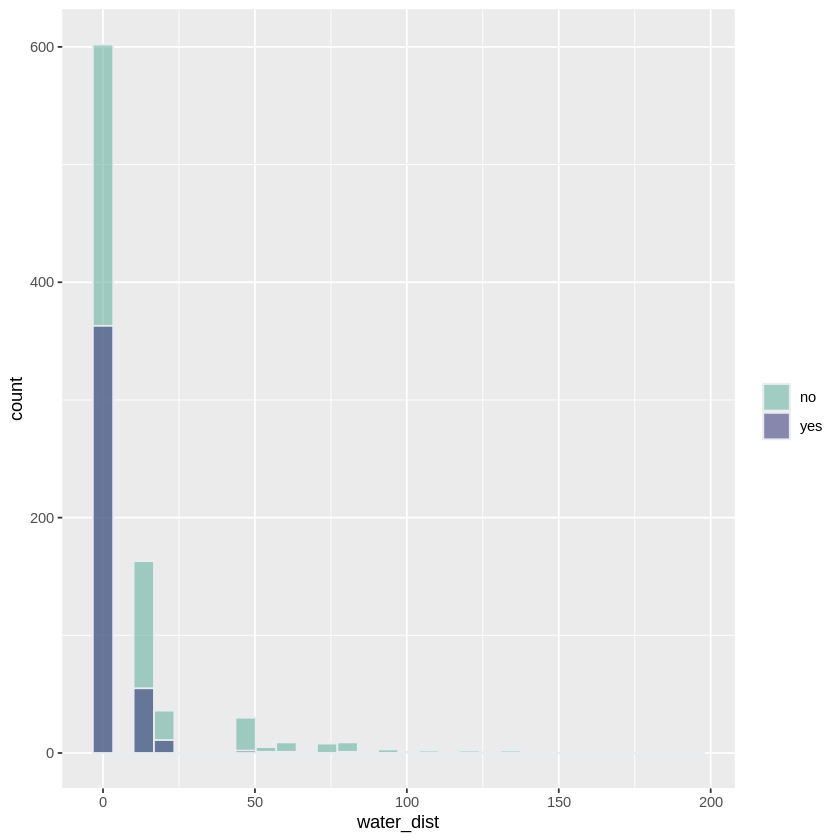

In [ ]:
#all_points$nest <- !is.na(as.character(all_points$nest))     # IIRC the system index column is a number if it is a nest, and an alpha-numeric code if a random point? If so this works.

p <- ggplot(data = all_points, aes(x=water_dist, fill=nest)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +
    labs(fill="")
p

ggsave("count_plot.png", width = 4, height = 4)

Plotting the data for the dry season

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


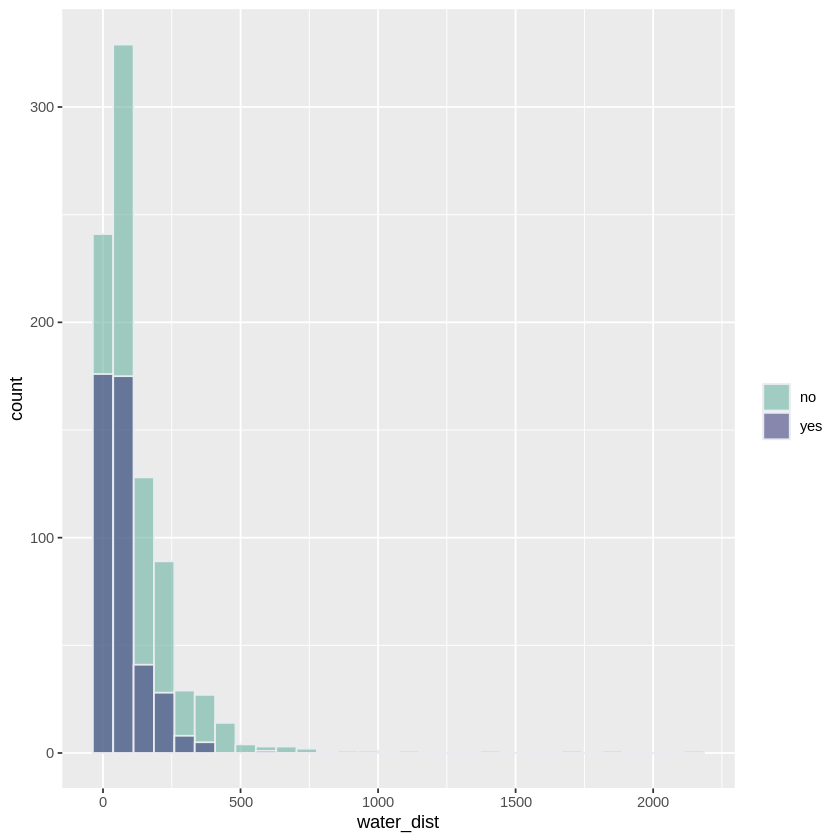

In [ ]:
#all_points$nest <- !is.na(as.character(all_points$nest))     # IIRC the system index column is a number if it is a nest, and an alpha-numeric code if a random point? If so this works.

p <- ggplot(data = all_points_ds, aes(x=water_dist, fill=nest)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#69b3a2", "#404080")) +
    labs(fill="")
p

ggsave("count_plot_ds.png", width = 4, height = 4)

Made a histogram to show the distance of giant ibis nests only to surface water in the wet season


Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


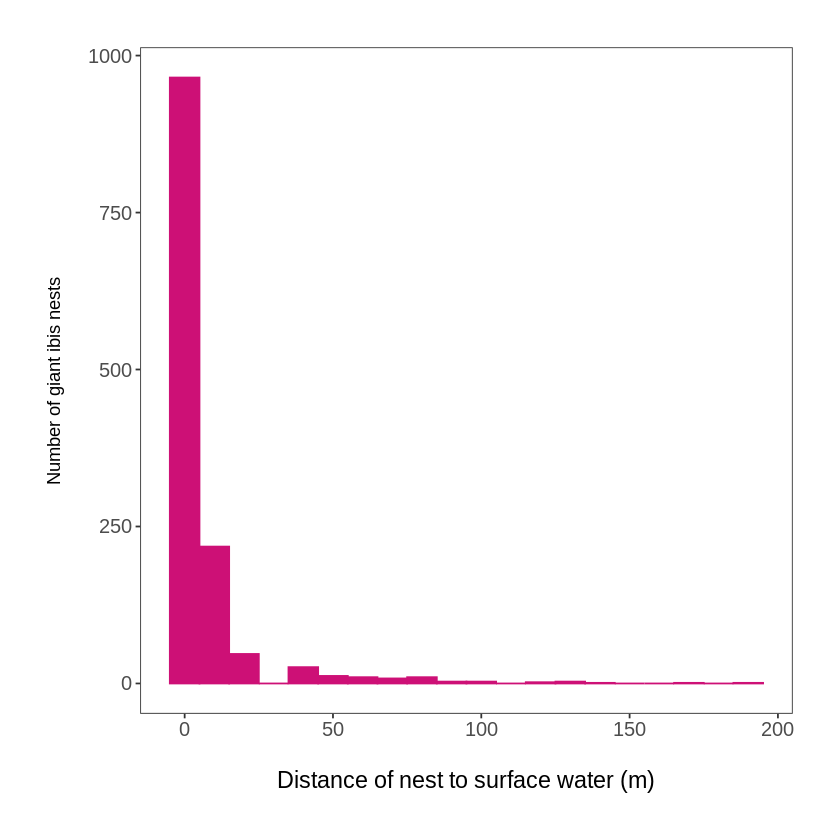

In [ ]:
(hist <- ggplot(all_points, aes(x = water_dist, fill=nest)) +
    geom_histogram(binwidth = 10, colour = "#CD1076", fill = "#CD1076") +
    theme_bw() +                                                      # Changing the theme to get rid of the grey background
    ylab("Number of giant ibis nests\n") +                                                   # Changing the text of the y axis label
    xlab("\nDistance of nest to surface water (m)")  +                              # \n adds a blank line between axis and text
    theme(axis.text = element_text(size = 12),                          # Changing font size of axis labels and title
          axis.title.x = element_text(size = 14, face = "plain"),       # face="plain" is the default, you can change it to italic, bold, etc.
          panel.grid = element_blank(),                                 # Removing the grey grid lines
          plot.margin = unit(c(1,1,1,1), units = , "cm")))

ggsave("hist_yr.png", width = 4, height = 4)

Making another histogram to show the distance of giant ibis nests only to surface water in the dry season

*can already see that points are generally much further away from surface water in the dry season than the wet season - logical!*


Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


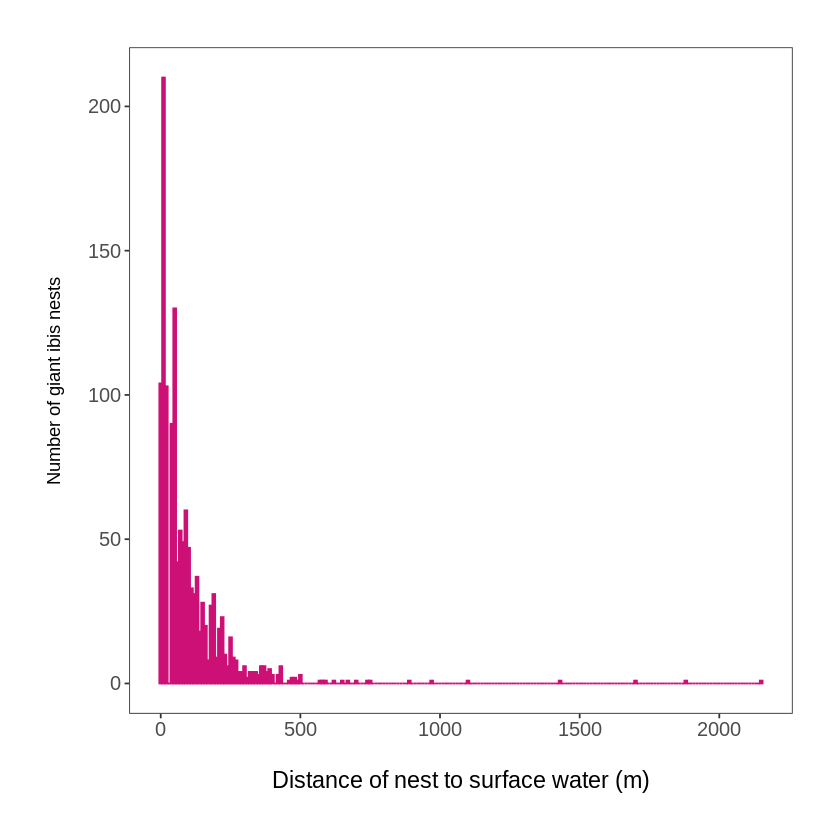

In [ ]:
(hist <- ggplot(all_points_ds, aes(x = water_dist, fill=nest)) +
    geom_histogram(binwidth = 10, colour = "#CD1076", fill = "#CD1076") +
    theme_bw() +                                                      # Changing the theme to get rid of the grey background
    ylab("Number of giant ibis nests\n") +                                                   # Changing the text of the y axis label
    xlab("\nDistance of nest to surface water (m)")  +                              # \n adds a blank line between axis and text
    theme(axis.text = element_text(size = 12),                          # Changing font size of axis labels and title
          axis.title.x = element_text(size = 14, face = "plain"),       # face="plain" is the default, you can change it to italic, bold, etc.
          panel.grid = element_blank(),                                 # Removing the grey grid lines
          plot.margin = unit(c(1,1,1,1), units = , "cm")))

ggsave("hist_ds.png", width = 4, height = 4)

****WET SEASON****

want to know what % of the 436 nests were within 25m of surface water want to know what % of the 876 random points were within 25m of surface water.
General info on the data note: ws is not ACTUALLY just the wet season its actually the whole year

In [ ]:
length(all_points$water_dist)
#there are 1314 points (nests and not nests)

[1] 1314

In [ ]:
table(all_points$nest)


 no yes 
876 438 

Selecting only nest points within it

In [ ]:
nest <- all_points %>%
filter(nest == 'yes')
dim(nest)

[1] 438  91

Selecting only non nest points within it

In [ ]:
random <- all_points %>%
filter(nest == 'no')
dim(random)

[1] 876  91

Looking at the % of nest points that are less than or equal to 10m from surface water

In [ ]:
percent_nest <- length(nest$water_dist[nest$water_dist <= 10])
goodbye <- length(nest$water_dist)
percent_nest
goodbye
percent_nest/goodbye

[1] 363

[1] 438

[1] 0.8287671

Looking at the % of nest points that are less than or equal to 25m from surface water

In [ ]:
percent_nest <- length(nest$water_dist[nest$water_dist <= 25])
goodbye <- length(nest$water_dist)
percent_nest
goodbye
percent_nest/goodbye

[1] 429

[1] 438

[1] 0.9794521

Looking at the % of nest points that are less than or equal to 50m from surface water

In [ ]:
percent_nest <- length(nest$water_dist[nest$water_dist <= 50])
goodbye <- length(nest$water_dist)
percent_nest
goodbye
percent_nest/goodbye

[1] 430

[1] 438

[1] 0.9817352

Looking at the % of non-nest points that are less than or equal to 10m from surface water

In [ ]:
percent_random <- length(random$water_dist[random$water_dist <= 10])
hello <- length(random$water_dist)
percent_random
hello
percent_random/hello

[1] 602

[1] 876

[1] 0.6872146

Looking at the % of non-nest points that are less than or equal to 25m from surface water

In [ ]:
percent_random <- length(random$water_dist[random$water_dist <= 25])
hello <- length(random$water_dist)
percent_random
hello
percent_random/hello

[1] 801

[1] 876

[1] 0.9143836

Looking at the % of non-nest points that are less than or equal to 50m from surface water

In [ ]:
percent_random <- length(random$water_dist[random$water_dist <= 50])
hello <- length(random$water_dist)
percent_random
hello
percent_random/hello

[1] 829

[1] 876

[1] 0.946347

Looking at the nest and non-nest points that are 10m or less from surface water

In [ ]:
close <- all_points$water_dist[all_points$water_dist < 10]
length(close)
close

[1] 965

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[963] 0 0 0

Looking at the nest and non-nest points that are 10m or more from surface water

In [ ]:
far <- all_points$water_dist[all_points$water_dist >= 10]
length(far)
far

[1] 349

[1]  14.55853  14.55294  20.90333  15.00000  20.90390  15.00000  14.55816
  [8]  20.89958  14.55775  14.54852  14.55573  20.90551  15.00000  15.00000
 [15]  14.54778  14.56160  20.89936  14.55710  20.90336  14.56463  14.55581
 [22]  14.55989  14.55535  14.55375  20.90115  14.55260  14.55264  15.00000
 [29]  15.00000  14.54553  14.55354  14.55190  14.55169  14.55458  15.00000
 [36]  15.00000  20.90511  62.71651  14.55214  14.56914       Inf  14.56492
 [43]  45.00000  14.54560  14.55722  14.55933  14.55710  14.55477  14.56132
 [50]  14.55605  14.56057  14.54869  20.89945  20.90183  20.90559  14.55228
 [57]  14.55591  15.00000  14.56065       Inf  14.55048  15.00000  79.11823
 [64]  14.54976  14.55678  14.55025  14.55049       Inf       Inf  50.01112
 [71]  14.56116  14.55610  50.89869  14.54948  14.55506  43.65184  20.90705
 [78] 122.73354  15.00000  20.91344  20.90547  15.00000  14.55486  15.00000
 [85]  14.56038  14.55482  14.56769  14.55185  14.55590  15.00000  43.67591
 [92]  14.55489 140.90158  14.54885  79.14906  14.56406  14.54442  15.00000
 [99]  20.89783  62.74805  14.55061  15.00000  14.55685  15.00000  15.00000
[106]  14.54494  92.72875  15.00000  15.00000  20.89502  14.56998  15.00000
[113]  15.00000  72.76078  14.54708  15.00000  14.55084  15.00000  20.89575
[120]  14.55557 133.74525  43.66160  14.54941  49.99029  14.54933  14.54904
[127]  62.69449  20.89521  14.55508  43.66636  15.00000  50.89269  14.57189
[134]  15.00000  62.73346  20.89989  15.00000  62.70106  20.89124  15.00000
[141]  15.00000  15.00000  20.90272  14.56023  14.54986  14.54916  14.55025
[148]  15.00000  14.56045  43.64778  43.65262  14.55654 170.91199  14.54833
[155]  14.54285  14.56242  20.90397  14.55465  72.74750  14.56406  15.00000
[162]  15.00000  20.89410  75.00000  14.55940  14.55441  15.00000  14.55947
[169]  20.90543  20.89418  62.71230  15.00000  15.00000  14.55779  20.89944
[176]  14.57453 128.58610  14.54977  45.00000  14.55642  15.00000  43.66165
[183]  43.63793  14.55554  14.55154  14.56103  14.55845  43.64778 105.00000
[190]  45.00000  20.89809  14.55561  14.54299  49.97480  14.55984 130.87243
[197]  14.56165  62.72227  15.00000  79.07156  14.55547  20.90638  43.66457
[204]  14.56177  20.89633  15.00000  80.89777 102.00697  20.89740  45.00000
[211]  20.89945  14.57239  14.55974  15.00000  20.90487  14.55729  15.00000
[218]  14.55666  14.54940  14.54216  14.55586  20.90277  15.00000  72.77539
[225]  15.00000  14.54831  72.73418  15.00000  20.90976  15.00000  14.56370
[232]  20.90499  14.55299  50.90304  14.55063  50.03273  14.55419  14.55729
[239]  20.90598  15.00000  14.54880  14.55513  14.54759  43.68095  20.91752
[246]  15.00000  50.90432  43.71185  14.55911  14.56101  15.00000  14.56731
[253]  43.65642  14.54740  14.55826 104.51142  45.00000  14.55896  14.55092
[260]  14.55015  75.00000  20.90497  14.56302  91.80873  14.55077  45.00000
[267]  14.55797  14.56199  75.00000  80.89759  14.55506  15.00000  14.54422
[274]  20.90527  20.90465  15.00000  15.00000  15.00000  14.55675  14.55498
[281]  20.91512  45.00000  14.55981  20.90195  14.55154  14.56211  14.54835
[288]  20.90484  14.55293  72.77973  14.56264  43.68135  15.00000  14.55262
[295]  14.55207  15.00000  45.00000  15.00000 194.49919  80.89986  45.00000
[302] 120.91563  79.15939  15.00000  14.55935  15.00000  14.55801  14.55779
[309]  14.55622  14.54713  14.54162  14.55797  14.55952  49.98853  14.55789
[316]  14.54830  14.55356  43.66016  14.56260  79.05703  15.00000  14.55989
[323]  80.90500  50.90328  14.54878  15.00000  62.69978  14.54606  20.91005
[330]  14.54052  50.90477  15.00000  20.89871  15.00000  62.72667  14.55311
[337]  14.55603  14.55707  14.56192  14.56170  91.75318  50.02099  62.72226
[344]  80.90432  43.62892  14.55293  45.00000  20.90532  20.89132


Looking at the nest and non-nest points that are 25m or less from surface water

In [ ]:
close <- all_points$water_dist[all_points$water_dist < 25]
length(close)
close

[1] 1230

[1]  0.00000  0.00000  0.00000  0.00000  0.00000 14.55853  0.00000  0.00000
   [9]  0.00000  0.00000  0.00000 14.55294  0.00000  0.00000  0.00000  0.00000
  [17]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [25]  0.00000  0.00000  0.00000 20.90333  0.00000 15.00000 20.90390  0.00000
  [33]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [41] 15.00000  0.00000 14.55816  0.00000  0.00000  0.00000  0.00000  0.00000
  [49]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [57]  0.00000  0.00000  0.00000  0.00000 20.89958  0.00000 14.55775  0.00000
  [65]  0.00000 14.54852  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [73]  0.00000  0.00000 14.55573  0.00000  0.00000  0.00000  0.00000  0.00000
  [81]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 20.90551
  [89] 15.00000 15.00000 14.54778  0.00000  0.00000  0.00000  0.00000  0.00000
  [97]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [105]  0.00000  0.00000 14.56160  0.00000 20.89936  0.00000  0.00000 14.55710
 [113] 20.90336  0.00000  0.00000  0.00000  0.00000 14.56463  0.00000  0.00000
 [121]  0.00000  0.00000  0.00000 14.55581  0.00000  0.00000 14.55989 14.55535
 [129]  0.00000 14.55375  0.00000  0.00000 20.90115  0.00000  0.00000  0.00000
 [137] 14.55260  0.00000 14.55264  0.00000  0.00000  0.00000 15.00000 15.00000
 [145]  0.00000 14.54553  0.00000  0.00000  0.00000  0.00000 14.55354  0.00000
 [153]  0.00000  0.00000 14.55190  0.00000  0.00000 14.55169 14.55458  0.00000
 [161] 15.00000 15.00000 20.90511  0.00000  0.00000  0.00000  0.00000  0.00000
 [169]  0.00000  0.00000 14.55214  0.00000  0.00000  0.00000  0.00000  0.00000
 [177]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [185]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [193]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [201]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [209]  0.00000 14.56914  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [217]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [225]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [233]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [241]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [249] 14.56492  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [257]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [265]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [273]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [281] 14.54560  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 14.55722
 [289]  0.00000  0.00000 14.55933  0.00000  0.00000 14.55710 14.55477 14.56132
 [297]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [305]  0.00000  0.00000  0.00000  0.00000  0.00000 14.55605  0.00000  0.00000
 [313]  0.00000  0.00000  0.00000  0.00000 14.56057  0.00000  0.00000  0.00000
 [321]  0.00000  0.00000  0.00000  0.00000  0.00000 14.54869  0.00000  0.00000
 [329] 20.89945  0.00000  0.00000  0.00000 20.90183  0.00000  0.00000 20.90559
 [337]  0.00000  0.00000  0.00000 14.55228  0.00000  0.00000  0.00000  0.00000
 [345]  0.00000  0.00000  0.00000  0.00000  0.00000 14.55591  0.00000  0.00000
 [353]  0.00000  0.00000 15.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [361]  0.00000  0.00000  0.00000 14.56065  0.00000 14.55048 15.00000  0.00000
 [369]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [377] 14.54976  0.00000  0.00000 14.55678  0.00000  0.00000  0.00000  0.00000
 [385]  0.00000  0.00000  0.00000  0.00000  0.00000 14.55025  0.00000  0.00000
 [393] 14.55049  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [401]  0.00000  0.00000  0.00000  0.00000  0.00000  

Looking at the nest and non-nest points that are 25m or more from surface water

In [ ]:
far <- all_points$water_dist[all_points$water_dist >= 25]
length(far)
far

[1] 84

[1]  62.71651       Inf  45.00000       Inf  79.11823       Inf       Inf
 [8]  50.01112  50.89869  43.65184 122.73354  43.67591 140.90158  79.14906
[15]  62.74805  92.72875  72.76078 133.74525  43.66160  49.99029  62.69449
[22]  43.66636  50.89269  62.73346  62.70106  43.64778  43.65262 170.91199
[29]  72.74750  75.00000  62.71230 128.58610  45.00000  43.66165  43.63793
[36]  43.64778 105.00000  45.00000  49.97480 130.87243  62.72227  79.07156
[43]  43.66457  80.89777 102.00697  45.00000  72.77539  72.73418  50.90304
[50]  50.03273  43.68095  50.90432  43.71185  43.65642 104.51142  45.00000
[57]  75.00000  91.80873  45.00000  75.00000  80.89759  45.00000  72.77973
[64]  43.68135  45.00000 194.49919  80.89986  45.00000 120.91563  79.15939
[71]  49.98853  43.66016  79.05703  80.90500  50.90328  62.69978  50.90477
[78]  62.72667  91.75318  50.02099  62.72226  80.90432  43.62892  45.00000

Looking at the nest and non-nest points that are 50m or less from surface water

In [ ]:
close <- all_points$water_dist[all_points$water_dist < 50]
length(close)
close

[1] 1259

[1]  0.00000  0.00000  0.00000  0.00000  0.00000 14.55853  0.00000  0.00000
   [9]  0.00000  0.00000  0.00000 14.55294  0.00000  0.00000  0.00000  0.00000
  [17]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [25]  0.00000  0.00000  0.00000 20.90333  0.00000 15.00000 20.90390  0.00000
  [33]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [41] 15.00000  0.00000 14.55816  0.00000  0.00000  0.00000  0.00000  0.00000
  [49]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [57]  0.00000  0.00000  0.00000  0.00000 20.89958  0.00000 14.55775  0.00000
  [65]  0.00000 14.54852  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
  [73]  0.00000  0.00000 14.55573  0.00000  0.00000  0.00000  0.00000  0.00000
  [81]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 20.90551
  [89] 15.00000 15.00000 14.54778  0.00000  0.00000  0.00000  0.00000  0.00000
  [97]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [105]  0.00000  0.00000 14.56160  0.00000 20.89936  0.00000  0.00000 14.55710
 [113] 20.90336  0.00000  0.00000  0.00000  0.00000 14.56463  0.00000  0.00000
 [121]  0.00000  0.00000  0.00000 14.55581  0.00000  0.00000 14.55989 14.55535
 [129]  0.00000 14.55375  0.00000  0.00000 20.90115  0.00000  0.00000  0.00000
 [137] 14.55260  0.00000 14.55264  0.00000  0.00000  0.00000 15.00000 15.00000
 [145]  0.00000 14.54553  0.00000  0.00000  0.00000  0.00000 14.55354  0.00000
 [153]  0.00000  0.00000 14.55190  0.00000  0.00000 14.55169 14.55458  0.00000
 [161] 15.00000 15.00000 20.90511  0.00000  0.00000  0.00000  0.00000  0.00000
 [169]  0.00000  0.00000 14.55214  0.00000  0.00000  0.00000  0.00000  0.00000
 [177]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [185]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [193]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [201]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [209]  0.00000 14.56914  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [217]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [225]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [233]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [241]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [249] 14.56492  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [257]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [265]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [273]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 45.00000
 [281]  0.00000 14.54560  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [289] 14.55722  0.00000  0.00000 14.55933  0.00000  0.00000 14.55710 14.55477
 [297] 14.56132  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [305]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 14.55605  0.00000
 [313]  0.00000  0.00000  0.00000  0.00000  0.00000 14.56057  0.00000  0.00000
 [321]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 14.54869  0.00000
 [329]  0.00000 20.89945  0.00000  0.00000  0.00000 20.90183  0.00000  0.00000
 [337] 20.90559  0.00000  0.00000  0.00000 14.55228  0.00000  0.00000  0.00000
 [345]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 14.55591  0.00000
 [353]  0.00000  0.00000  0.00000 15.00000  0.00000  0.00000  0.00000  0.00000
 [361]  0.00000  0.00000  0.00000  0.00000 14.56065  0.00000 14.55048 15.00000
 [369]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [377]  0.00000 14.54976  0.00000  0.00000 14.55678  0.00000  0.00000  0.00000
 [385]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 14.55025  0.00000
 [393]  0.00000 14.55049  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [401]  0.00000  0.00000  0.00000  0.00000  0.00000  

Looking at the nest and non-nest points that are 50m or more from surface water




In [ ]:
far <- all_points$water_dist[all_points$water_dist >= 50]
length(far)
far

[1] 55

[1]  62.71651       Inf       Inf  79.11823       Inf       Inf  50.01112
 [8]  50.89869 122.73354 140.90158  79.14906  62.74805  92.72875  72.76078
[15] 133.74525  62.69449  50.89269  62.73346  62.70106 170.91199  72.74750
[22]  75.00000  62.71230 128.58610 105.00000 130.87243  62.72227  79.07156
[29]  80.89777 102.00697  72.77539  72.73418  50.90304  50.03273  50.90432
[36] 104.51142  75.00000  91.80873  75.00000  80.89759  72.77973 194.49919
[43]  80.89986 120.91563  79.15939  79.05703  80.90500  50.90328  62.69978
[50]  50.90477  62.72667  91.75318  50.02099  62.72226  80.90432

Calculating the median distance of giant ibis nests from surface water in wet season - this value will be to add onto the plot below to show the distance that 50% of the gibis nests are found at. need to create a subset of the data to include just the nests.
median is zero meters... logical as there is water everywhere!?

In [ ]:
#range(all_points$water_dist)
#median(all_points$water_dist)

all_points_nests <- subset(all_points, nest == "yes")
all_points_nests

median_yes <- median(all_points_nests$water_dist)
median_yes

,nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo,water_dist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
1,yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,14.55496,204.52610,14.55496,0.00000,2003,0,KPWS,NA,NA,0.00000
2,yes,NA,NA,50.00536,0.00000,20.89948,NA,14.55294,14.55294,14.55294,⋯,122.69835,134.49745,14.55294,43.65883,2003,1,KPWS,NA,NA,0.00000
3,yes,NA,NA,0.00000,14.55775,45.00000,NA,0.00000,80.90280,0.00000,⋯,20.90283,62.70849,0.00000,NA,2003,2,KPWS,NA,NA,0.00000
4,yes,NA,NA,14.55513,0.00000,104.50504,NA,45.00000,20.90100,0.00000,⋯,122.70303,45.00000,0.00000,0.00000,2003,3,KPWS,NA,NA,0.00000
5,yes,NA,NA,14.55853,0.00000,0.00000,NA,45.00000,0.00000,0.00000,⋯,NA,20.90337,0.00000,NA,2004,4,KPWS,NA,NA,0.00000
6,yes,NA,NA,14.55853,50.02044,43.67560,NA,0.00000,50.02044,14.55853,⋯,NA,50.02044,14.55853,NA,2004,5,KPWS,NA,NA,14.55853
7,yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,14.55496,204.52610,14.55496,0.00000,2004,6,KPWS,NA,NA,0.00000
8,yes,NA,NA,15.00000,43.66457,224.66879,NA,0.00000,146.30577,15.00000,⋯,170.90087,220.94257,0.00000,0.00000,2004,7,KPWS,NA,NA,0.00000
9,yes,NA,NA,0.00000,0.00000,92.70470,NA,0.00000,0.00000,14.55596,⋯,20.90158,15.00000,14.55596,NA,2004,8,KPWS,NA,NA,0.00000


[1] 0

Just had a look at the median of non nest points as well for interest, median is also zero meters. This makes sense as there is water everywhere so all points are likely to be close to water.

In [ ]:
#range(all_points_ws$water_dist)
#median(all_points_ws$water_dist)

all_points_not_nests <- subset(all_points, nest == "no")
all_points_not_nests

median_no <- median(all_points_not_nests$water_dist)
median_no

,nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo,water_dist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
441,no,NA,NA,14.55622,0.00000,50.01420,NA,50.90175,0.00000,20.90176,⋯,NA,62.70529,0.00000,14.55622,2003,NA,NA,0,"{""type"":""Point"",""coordinates"":[105.12190522725676,13.971915365464001]}",0.00000
442,no,NA,NA,15.00000,43.65184,49.99909,NA,110.89782,15.00000,15.00000,⋯,20.89786,319.87675,20.89786,20.89786,2003,NA,NA,1,"{""type"":""Point"",""coordinates"":[104.93853626157595,14.060215632664768]}",43.65184
443,no,104.53521,0.0000,0.00000,176.34917,346.48715,NA,20.90705,108.28996,91.84880,⋯,15.00000,80.90708,50.03469,14.56382,2003,NA,NA,2,"{""type"":""Point"",""coordinates"":[104.81028732598473,13.85095784490326]}",20.90705
444,no,NA,NA,0.00000,0.00000,15.00000,NA,15.00000,0.00000,0.00000,⋯,15.00000,131.05519,0.00000,0.00000,2003,NA,NA,3,"{""type"":""Point"",""coordinates"":[105.34386782439006,13.884982572388948]}",0.00000
445,no,91.80971,NA,0.00000,79.11743,79.11743,0.00000,0.00000,0.00000,14.55426,⋯,NA,0.00000,0.00000,0.00000,2004,NA,NA,4,"{""type"":""Point"",""coordinates"":[105.30907433952788,14.002755816131485]}",0.00000
446,no,266.58498,NA,20.90577,50.90578,495.82790,NA,20.90577,0.00000,206.34051,⋯,NA,50.02972,110.90580,175.46412,2004,NA,NA,5,"{""type"":""Point"",""coordinates"":[105.04479337336277,13.880416091249312]}",0.00000
447,no,72.84864,NA,50.05062,122.73354,110.91113,NA,596.37846,301.84461,696.25442,⋯,236.37783,20.91117,122.73342,NA,2004,NA,NA,6,"{""type"":""Point"",""coordinates"":[104.8971068820817,13.756565973311483]}",122.73354
448,no,43.73408,104.5848,0.00000,14.57803,91.90686,NA,152.75074,0.00000,62.75086,⋯,20.91695,15.00000,14.57803,14.57803,2004,NA,NA,7,"{""type"":""Point"",""coordinates"":[104.98916023615114,13.6225218451321]}",0.00000
449,no,15.00000,0.0000,43.64912,72.74853,146.28046,NA,149.98992,15.00000,195.00000,⋯,NA,45.00000,152.69172,208.18874,2004,NA,NA,8,"{""type"":""Point"",""coordinates"":[104.50183798067214,14.074517979843353]}",15.00000


[1] 0

Calculating the 75 percentile instead of the median as the median annually gives 0m... this will then be used to create the plots for loss of giant ibis habitat (Gibis Habitat-Plot-cleaned.R)

In [ ]:
quant_nests <- quantile(all_points_nests$water_dist, probs = c(.25, .5, .75))
quant_nests

25% 50% 75% 
  0   0   0

In [ ]:
quant_nests_check <-quantile(all_points_nests$water_dist, probs = c(.65, .75, .85))
quant_nests_check

65%      75%      85% 
 0.00000  0.00000 14.55049

In [ ]:
quant_not_nests <- quantile(all_points_not_nests$water_dist, probs = c(.25, .5, .75))
quant_not_nests

25%      50%      75% 
 0.00000  0.00000 14.55549

In [ ]:
quant_not_nests_check <- quantile(all_points_not_nests$water_dist, probs = c(.65, .75, .85))
quant_not_nests_check

65%      75%      85% 
 0.00000 14.55549 15.00000

Make a plot to show the nest and non-nest points and their distances to surface water

Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”


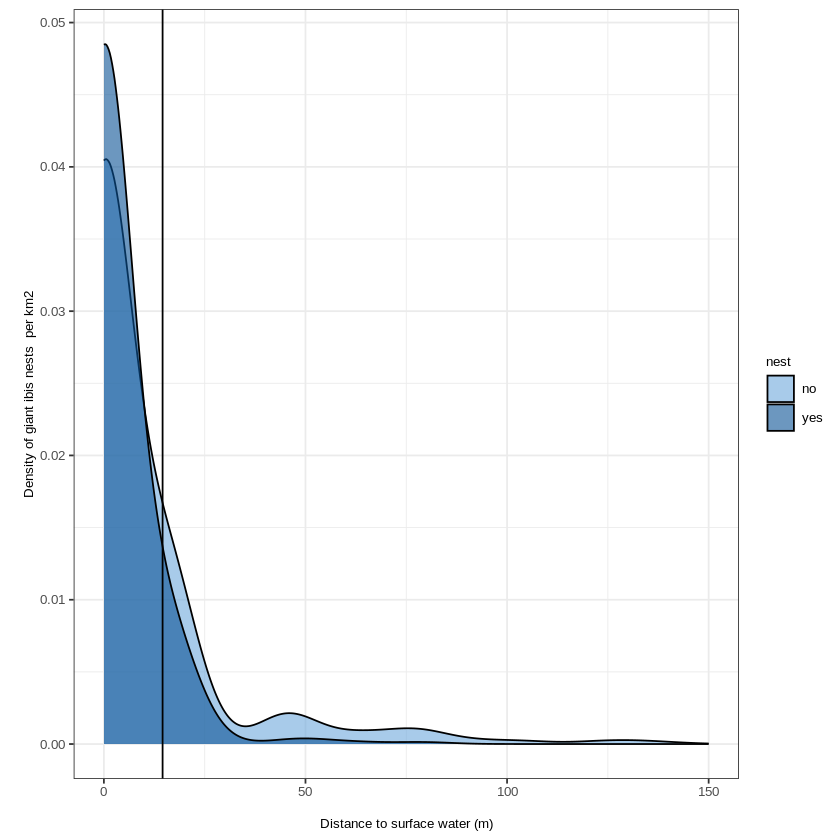

In [ ]:
#all_points$nest <- !is.na(as.character(all_points$nest))     # IIRC the system index column is a number if it is a nest, and an alpha-numeric code if a random point? If so this works.

p_ws <- ggplot(data = all_points[!is.nan(all_points$water_dist),], aes(x=water_dist, fill=nest)) +
    geom_density(alpha=0.6, bw = 7) +
     scale_fill_manual(values=c("#6fa8dc", "#0b5394")) +
     geom_vline(xintercept=14.56) + #add in the line for 75 percentile
     theme_bw() +  # Changing the theme to get rid of the grey background
     xlim(0, 150) +
      ylab("\nDensity of giant ibis nests  per km2") + # Changing the text of the y axis label
    xlab("\nDistance to surface water (m)") + # Changing the text of the x axis label
    theme(axis.text=element_text(size=8),
          axis.title=element_text(size=8)) + #change the size of the values on the axes - easier to read
  theme(legend.text = element_text(size=8),
        legend.title = element_text(size=8))
p_ws

ggsave("plot.png", width = 4, height = 4)

In [ ]:
write.csv(all_points, file = "all_points_yr_export.csv")

Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”


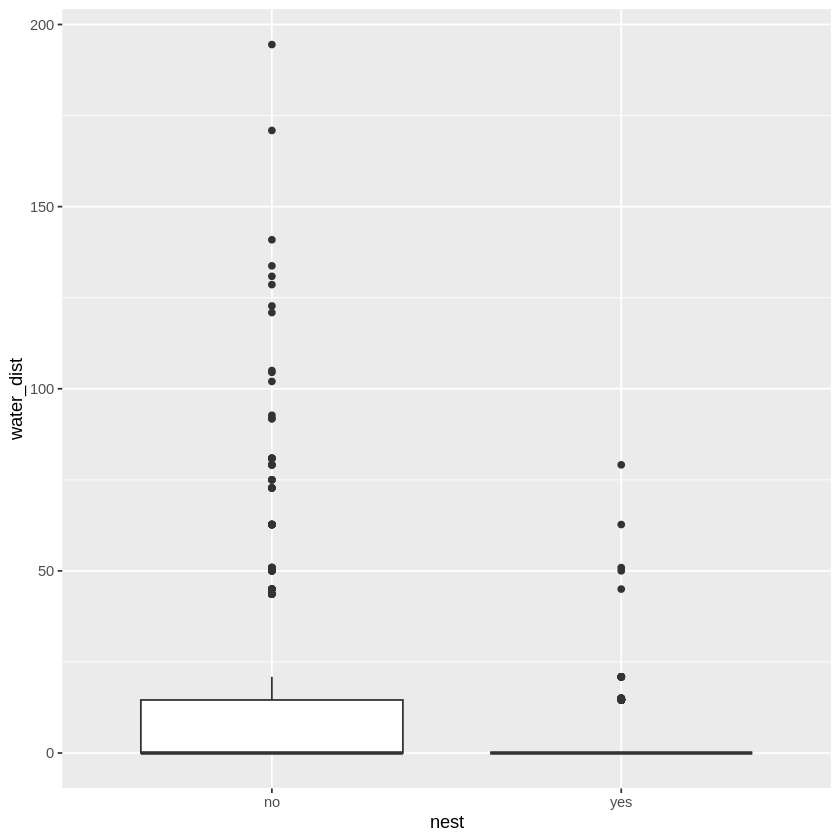

In [ ]:
ggplot(all_points, aes(x = nest, y = water_dist)) +
geom_boxplot()

We completed a Mann-Whitney U to determine whether these is an actual statistical difference between the nest points distance to water and the random points distance to water

In [ ]:
wilcox.test(all_points$water_dist~all_points$nest)


	Wilcoxon rank sum test with continuity correction

data:  all_points$water_dist by all_points$nest
W = 221225, p-value = 5.52e-09
alternative hypothesis: true location shift is not equal to 0


***DRY SEASON***

want to know what % of the 436 nests were within 25m of surface water want to know what % of the 876 random points were within 25m of surface water - general info on the data

In [ ]:
length(all_points_ds$water_dist)
#there are 1314 points (nests and not nests)

[1] 1314

In [ ]:
table(all_points_ds$nest)


 no yes 
876 438 

Here we are making a thing that has only nests within it - filtering for nest points

In [ ]:
nest_ds <- all_points_ds %>%
filter(nest == 'yes')
dim(nest_ds)

[1] 438  91

Here we are making a thing that has only random points within it - filtering for random points

In [ ]:
random_ds <- all_points_ds %>%
filter(nest == 'no')
dim(random_ds)

[1] 876  91

Looking at the % of nest points that are less than or equal to 10m from surface water

In [ ]:
percent_nest_ds <- length(nest_ds$water_dist[nest_ds$water_dist <= 10])
goodbye_ds <- length(nest_ds$water_dist)
percent_nest_ds
goodbye_ds
percent_nest_ds/goodbye_ds

[1] 56

[1] 438

[1] 0.1278539

Looking at the % of non-nest points that are less than or equal to 10m from surface water

In [ ]:
percent_random_ds <- length(random_ds$water_dist[random_ds$water_dist <= 10])
hello_ds <- length(random_ds$water_dist)
percent_random_ds
hello_ds
percent_random_ds/hello_ds

[1] 52

[1] 876

[1] 0.05936073

Looking at the % of nest points that are less than or equal to 25m from surface water

In [ ]:
percent_nest_ds <- length(nest_ds$water_dist[nest_ds$water_dist <= 25])
goodbye_ds <- length(nest_ds$water_dist)
percent_nest_ds
goodbye_ds
percent_nest_ds/goodbye_ds

[1] 180

[1] 438

[1] 0.4109589

Looking at the % of non-nest points that are less than or equal to 25m from surface water

In [ ]:
percent_random_ds <- length(random_ds$water_dist[random_ds$water_dist <= 25])
hello_ds <- length(random_ds$water_dist)
percent_random_ds
hello_ds
percent_random_ds/hello_ds

[1] 241

[1] 876

[1] 0.2751142

Looking at the % of nest points that are less than or equal to 50m from surface water

In [ ]:
percent_nest_ds <- length(nest_ds$water_dist[nest_ds$water_dist <= 50])
goodbye_ds <- length(nest_ds$water_dist)
percent_nest_ds
goodbye_ds
percent_nest_ds/goodbye_ds

[1] 225

[1] 438

[1] 0.5136986

Looking at the % of non-nest points that are less than or equal to 50m from surface water

In [ ]:
percent_random_ds <- length(random_ds$water_dist[random_ds$water_dist <= 50])
hello_ds <- length(random_ds$water_dist)
percent_random_ds
hello_ds
percent_random_ds/hello_ds

[1] 312

[1] 876

[1] 0.3561644

Looking at the number of nest and non-nest points that are 10m or less from surface water

In [ ]:
close_ds <- all_points_ds$water_dist[all_points_ds$water_dist < 10]
length(close_ds)
close_ds

[1] 108

[1]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [16]    0    0 -Inf    0    0    0    0    0    0    0    0    0    0    0    0
 [31]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [46]    0    0    0 -Inf    0    0    0    0    0 -Inf -Inf    0    0    0    0
 [61]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [76]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [91]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[106]    0    0    0

Looking at the number of nest and non-nest points that are 10m or more from surface water

In [ ]:
far_ds <- all_points_ds$water_dist[all_points_ds$water_dist >= 10]
length(far_ds)
far_ds

[1] 1206

[1]  212.70271   20.89948   45.00000  104.50504   50.02044   15.00000
   [7]  146.30577   14.55596   14.55596  206.30680   20.89948   43.65883
  [13]  206.30680  279.16740  122.71361  122.71361   80.90391   62.71168
  [19]   75.00000   75.00000   75.00000   20.90408   20.90408   20.90369
  [25]   43.66692   43.66528   92.71003   92.70270   45.00000  386.32752
  [31]   75.00000  179.18611   79.09056   14.55467  122.71361   50.02245
  [37]   43.66487   15.00000  140.90073   20.90312   43.68740   20.90311
  [43]   15.00000   75.00000  134.51438   20.90223   20.90171   49.99344
  [49]   50.03104   15.00000   75.00000  164.53321  122.71024   45.00000
  [55]   15.00000  175.37194   80.90198   45.00000  120.91106   50.90008
  [61]   14.55775   20.90665   49.99344   43.64335   14.56247   91.81884
  [67]   79.13383   14.55424  191.82853   20.90141   20.90076   79.11951
  [73]  137.32629   50.02872   50.90428   45.00000   14.55775   50.00619
  [79]   62.68084  105.00000   50.02872   80.90459  134.52891   45.00000
  [85]   45.00000   80.89937   79.09395   14.54606  379.95965   79.15081
  [91]   15.00000   92.70758   14.55200   92.70445  224.73332  146.33845
  [97]   14.56042   50.89935  188.05306  104.50742   80.90235   92.71010
 [103]  140.89932   20.90551   75.00000   75.00000   91.85206   50.89590
 [109]   14.55279   14.55325   62.70199  162.71498   14.55581   15.00000
 [115]  101.88745  165.00000  266.29981  110.89951  212.70857   79.12255
 [121]  175.41748  329.95491  179.13043  276.49942   14.56204   45.00000
 [127]  225.00000   50.90164   50.00762   91.81537   91.82156  104.51341
 [133]   45.00000   75.00000  618.88553   50.90257  254.51210   91.80672
 [139]   50.89825   15.00000   72.81233  170.89881   50.89956   62.68040
 [145]   92.69585   75.00000  135.00000  146.30020  272.71828  133.64764
 [151]  366.63581  289.89994  133.62224  122.68958   15.00000   62.68279
 [157]  108.17405   14.54716   14.55214  134.51029   15.00000   50.02044
 [163]   14.55347   14.56196   15.00000   50.01245   20.90530   15.00000
 [169]   20.90057   14.55661  105.00000   50.89665   50.90080   50.89712
 [175]   45.00000   91.79349   43.65570  313.41710  170.90115   20.90306
 [181]   20.90155  217.22930   50.90527  108.23383  104.47563  361.62612
 [187]   62.69277   50.89873   50.01057   49.99816  212.68539   15.00000
 [193]   91.78555   20.90328   15.00000   50.04904  176.34849   15.00000
 [199]   50.02940  108.24010  188.08229   15.00000   14.56128   75.00000
 [205]  101.81857  176.26603   14.55661   45.00000   50.01332   15.00000
 [211]   45.00000   20.90571  135.00000   50.89514  236.29131  130.97094
 [217]  188.07836   14.54935   20.89697   50.01452   14.55984   15.00000
 [223]  120.92508   15.00000   14.54668   43.65082   79.15041   14.56492
 [229]   14.55710   72.77880   43.70430   14.56186   43.64572   49.98709
 [235]   15.00000   79.09734   20.90204   79.09734   50.90762   80.89299
 [241]   20.89435  223.97641   75.00000   14.55630   15.00000   50.90683
 [247]   20.89436   80.89669   14.54938   50.89513   49.99774   14.55722
 [253]   14.56065   43.67799   20.90238   14.55477   14.56132   14.56196
 [259]   15.00000   45.00000   14.54415   49.99774   14.55636   20.90500
 [265]  104.52649   50.02967   15.00000   14.55717   14.55605   50.01645
 [271]   20.90074   14.55705  122.70569   14.55644   72.80285   20.90485
 [277]   15.00000  104.52649   80.89697  108.19925  149.95653   91.80154
 [283]   14.54869   15.00000  160.12066   62.69835  233.60369  101.86677
 [289]   20.90146   20.90183   45.00000   15.00000   91.84023   14.56132
 [295]   14.56076  233.60685  105.00000   43.66999   79.12776   50.90348
 [301]   43.64989  224.46353   43.65980   50.90121  254.48348   20.90155
 [307]   20.90248  391.75167  179.15557   45.00000   62.70299   50.01626
 [313]   50.90227   79.12624   50.00347   91.83205   45.00000   20.90249
 [319]   20.90485  258.98986  195.50349   72.76121   14.55183  108.19224
 [325]   15.00000   15.00000   15.00000  218.31643   50.90227

Looking at the number of nest and non-nest points that are 25m or less from surface water

In [ ]:
close_ds <- all_points_ds$water_dist[all_points_ds$water_dist < 25]
length(close_ds)
close_ds

[1] 421

[1] 20.89948  0.00000 15.00000 14.55596 14.55596 20.89948 20.90408 20.90408
  [9] 20.90369 14.55467 15.00000 20.90312 20.90311 15.00000 20.90223 20.90171
 [17] 15.00000  0.00000 15.00000 14.55775  0.00000 20.90665 14.56247  0.00000
 [25]  0.00000 14.55424 20.90141 20.90076  0.00000  0.00000 14.55775  0.00000
 [33]  0.00000  0.00000 14.54606  0.00000 15.00000 14.55200 14.56042 20.90551
 [41] 14.55279 14.55325 14.55581  0.00000  0.00000 15.00000 14.56204 15.00000
 [49] 15.00000 14.54716 14.55214  0.00000 15.00000 14.55347 14.56196 15.00000
 [57]  0.00000 20.90530 15.00000 20.90057 14.55661 20.90306 20.90155 15.00000
 [65] 20.90328 15.00000  0.00000 15.00000 15.00000 14.56128  0.00000 14.55661
 [73] 15.00000     -Inf  0.00000 20.90571 14.54935 20.89697 14.55984 15.00000
 [81] 15.00000 14.54668  0.00000  0.00000  0.00000  0.00000 14.56492  0.00000
 [89]  0.00000 14.55710  0.00000  0.00000 14.56186  0.00000  0.00000  0.00000
 [97] 15.00000  0.00000  0.00000  0.00000 20.90204  0.00000 20.89435 14.55630
[105]  0.00000  0.00000 15.00000  0.00000 20.89436  0.00000 14.54938  0.00000
[113] 14.55722 14.56065  0.00000  0.00000  0.00000 20.90238 14.55477 14.56132
[121] 14.56196 15.00000  0.00000 14.54415 14.55636 20.90500 15.00000 14.55717
[129]  0.00000 14.55605 20.90074 14.55705  0.00000 14.55644 20.90485 15.00000
[137]  0.00000 14.54869 15.00000 20.90146 20.90183 15.00000  0.00000 14.56132
[145] 14.56076 20.90155 20.90248  0.00000 20.90249 20.90485     -Inf 14.55183
[153]  0.00000 15.00000 15.00000 15.00000 14.56115 14.55622  0.00000 14.55224
[161] 14.55171  0.00000  0.00000 14.55049  0.00000 15.00000 14.55755 15.00000
[169] 15.00000     -Inf     -Inf 20.89635 20.89963 14.55612 14.55702 15.00000
[177] 20.90168 20.89635 20.90232 20.89683 15.00000 14.55426 14.56093 20.90699
[185] 14.54477 14.54737  0.00000  0.00000 15.00000 20.90416 20.90645  0.00000
[193] 14.55675 14.54821 14.55782 14.54539 15.00000 15.00000 20.89382 20.89725
[201] 15.00000 14.54761 14.55733 20.89022 20.89804 14.55982 20.90017 14.55937
[209] 14.55115 15.00000  0.00000 14.55240 20.89774  0.00000 14.56208  0.00000
[217]  0.00000 14.56213 20.90081 14.55583 20.89667  0.00000  0.00000  0.00000
[225]  0.00000  0.00000 14.54941 14.54611 15.00000 14.55063 15.00000 15.00000
[233] 14.55080  0.00000 15.00000 15.00000 14.56319 15.00000  0.00000  0.00000
[241] 15.00000 14.54833 14.54967  0.00000 14.55409 20.90658 14.56216 20.89900
[249] 15.00000 20.89861 20.90302  0.00000 20.89963 20.89321 20.90343 14.56028
[257] 20.90286  0.00000  0.00000 14.54591 20.89124 15.00000 15.00000 14.54589
[265] 14.55624 15.00000  0.00000 14.54916  0.00000  0.00000  0.00000 20.89227
[273]  0.00000 14.56067  0.00000  0.00000 15.00000 15.00000 14.55494 15.00000
[281] 14.54285 20.89201 15.00000 14.56213 20.89373 14.55794 20.89857  0.00000
[289] 14.55547 15.00000  0.00000 20.89727 20.89673  0.00000 15.00000 15.00000
[297] 15.00000 20.89533 14.55869  0.00000 20.90911 20.89758  0.00000 15.00000
[305] 20.89916 20.89079 20.89446 15.00000 20.90236  0.00000 20.90564 20.90380
[313] 14.55012 14.54869  0.00000 15.00000 20.90093 20.90370  0.00000 20.89187
[321] 14.54950 20.90818 14.54814 14.56424 14.54353 20.90119  0.00000 15.00000
[329] 15.00000 14.54831 20.90697 14.54869 14.55772 20.90605 15.00000 20.90333
[337] 20.89382 20.90582 15.00000  0.00000 15.00000  0.00000 14.54759  0.00000
[345] 15.00000  0.00000 15.00000 14.56052 15.00000 15.00000 14.54955 14.55020
[353]  0.00000 20.90305  0.00000 14.54950  0.00000 14.55344 14.55027 14.54989
[361] 14.55914  0.00000 15.00000 15.00000 20.90877  0.00000 14.54740 14.55826
[369] 15.00000 20.89866 14.54948 14.55077  0.00000 15.00000 14.54883 20.90521
[377]  0.00000 14.54802 14.55157 20.90458 20.90095 20.89340 14.55634 14.55465
[385]  0.00000 20.89317 14.54268  0.00000 14.55552 15.00000 20.89857 20.89850
[393] 20.90586 14.55813 14.54828 14.55262 15.00000 15.00000 20.90069 15.00000
[401] 14.54830 20.90344 15.00000  0.00000 14.55219 14.55226 20.90763 20.90300
[409] 15.00000 15.00000 

Looking at the number of nest and non-nest points that are 25m or further from surface water

In [ ]:
far_ds <- all_points_ds$water_dist[all_points_ds$water_dist >= 25]
length(far_ds)
far_ds

[1] 893

[1]  212.70271   45.00000  104.50504   50.02044  146.30577  206.30680
  [7]   43.65883  206.30680  279.16740  122.71361  122.71361   80.90391
 [13]   62.71168   75.00000   75.00000   75.00000   43.66692   43.66528
 [19]   92.71003   92.70270   45.00000  386.32752   75.00000  179.18611
 [25]   79.09056  122.71361   50.02245   43.66487  140.90073   43.68740
 [31]   75.00000  134.51438   49.99344   50.03104   75.00000  164.53321
 [37]  122.71024   45.00000  175.37194   80.90198   45.00000  120.91106
 [43]   50.90008   49.99344   43.64335   91.81884   79.13383  191.82853
 [49]   79.11951  137.32629   50.02872   50.90428   45.00000   50.00619
 [55]   62.68084  105.00000   50.02872   80.90459  134.52891   45.00000
 [61]   45.00000   80.89937   79.09395  379.95965   79.15081   92.70758
 [67]   92.70445  224.73332  146.33845   50.89935  188.05306  104.50742
 [73]   80.90235   92.71010  140.89932   75.00000   75.00000   91.85206
 [79]   50.89590   62.70199  162.71498  101.88745  165.00000  266.29981
 [85]  110.89951  212.70857   79.12255  175.41748  329.95491  179.13043
 [91]  276.49942   45.00000  225.00000   50.90164   50.00762   91.81537
 [97]   91.82156  104.51341   45.00000   75.00000  618.88553   50.90257
[103]  254.51210   91.80672   50.89825   72.81233  170.89881   50.89956
[109]   62.68040   92.69585   75.00000  135.00000  146.30020  272.71828
[115]  133.64764  366.63581  289.89994  133.62224  122.68958   62.68279
[121]  108.17405  134.51029   50.02044   50.01245  105.00000   50.89665
[127]   50.90080   50.89712   45.00000   91.79349   43.65570  313.41710
[133]  170.90115  217.22930   50.90527  108.23383  104.47563  361.62612
[139]   62.69277   50.89873   50.01057   49.99816  212.68539   91.78555
[145]   50.04904  176.34849   50.02940  108.24010  188.08229   75.00000
[151]  101.81857  176.26603   45.00000   50.01332   45.00000  135.00000
[157]   50.89514  236.29131  130.97094  188.07836   50.01452  120.92508
[163]   43.65082   79.15041   72.77880   43.70430   43.64572   49.98709
[169]   79.09734   79.09734   50.90762   80.89299  223.97641   75.00000
[175]   50.90683   80.89669   50.89513   49.99774   43.67799   45.00000
[181]   49.99774  104.52649   50.02967   50.01645  122.70569   72.80285
[187]  104.52649   80.89697  108.19925  149.95653   91.80154  160.12066
[193]   62.69835  233.60369  101.86677   45.00000   91.84023  233.60685
[199]  105.00000   43.66999   79.12776   50.90348   43.64989  224.46353
[205]   43.65980   50.90121  254.48348  391.75167  179.15557   45.00000
[211]   62.70299   50.01626   50.90227   79.12624   50.00347   91.83205
[217]   45.00000  258.98986  195.50349   72.76121  108.19224  218.31643
[223]   50.90227   45.00000   45.00000   75.00000   43.68557  204.54187
[229]   49.99326   92.71637  140.90045   62.70351   49.99811   72.74707
[235]   98.18185  188.11884   50.01457   43.65436   43.65539  110.90127
[241]  176.31334  101.94377  164.48368   79.10329   80.90094   80.90274
[247]   50.02753  249.98325   49.99265  146.29086  179.08692   43.68339
[253]  200.90158  105.00000   92.70120  317.24113  191.84519  208.21153
[259]   50.90175  110.89782  346.48715  206.34051  696.25442  230.91687
[265]  195.00000  248.10827  108.22388  110.91341  333.76497   50.01310
[271]   75.00000  105.00000  247.25526   50.89839  134.50410   50.89664
[277]   62.70080  150.04371   49.97405  179.18130   92.71400   50.90080
[283]   45.00000   45.00000  160.06731   45.00000  134.54426  104.50388
[289]   50.90639  150.01403  359.03648  134.54866   92.68480  108.27683
[295]   75.00000   50.90060   79.15272  195.00000  176.31085  162.71279
[301]  188.11179   50.90306   50.00347  250.08962  120.91075  319.88570
[307]  272.71042  218.31003  146.27544  289.86022   75.00000  140.90158
[313]  110.89659  468.12993   50.89497  342.73693  247.43313  188.13680
[319]   49.98239  194.48481   92.72597  404.48852  194.47062  246.47220
[325]   92.72618   45.00000  166.68280  105.00000  225.00000   62.67615
[331]   92.71365   50.89812   45.00000  43

Looking at the number of nest and non-nest points that are 50m or less from surface water

In [ ]:
close_ds <- all_points_ds$water_dist[all_points_ds$water_dist < 50]
length(close_ds)
close_ds

[1] 537

[1] 20.89948 45.00000  0.00000 15.00000 14.55596 14.55596 20.89948 43.65883
  [9] 20.90408 20.90408 20.90369 43.66692 43.66528 45.00000 14.55467 43.66487
 [17] 15.00000 20.90312 43.68740 20.90311 15.00000 20.90223 20.90171 49.99344
 [25] 15.00000 45.00000  0.00000 15.00000 45.00000 14.55775  0.00000 20.90665
 [33] 49.99344 43.64335 14.56247  0.00000  0.00000 14.55424 20.90141 20.90076
 [41]  0.00000 45.00000  0.00000 14.55775 45.00000 45.00000  0.00000  0.00000
 [49]  0.00000 14.54606  0.00000 15.00000 14.55200 14.56042 20.90551 14.55279
 [57] 14.55325 14.55581  0.00000  0.00000 15.00000 14.56204 45.00000 45.00000
 [65] 15.00000 15.00000 14.54716 14.55214  0.00000 15.00000 14.55347 14.56196
 [73] 15.00000  0.00000 20.90530 15.00000 20.90057 14.55661 45.00000 43.65570
 [81] 20.90306 20.90155 49.99816 15.00000 20.90328 15.00000  0.00000 15.00000
 [89] 15.00000 14.56128  0.00000 14.55661 45.00000 15.00000 45.00000     -Inf
 [97]  0.00000 20.90571 14.54935 20.89697 14.55984 15.00000 15.00000 14.54668
[105] 43.65082  0.00000  0.00000  0.00000  0.00000 14.56492  0.00000  0.00000
[113] 14.55710  0.00000  0.00000 43.70430 14.56186  0.00000  0.00000  0.00000
[121] 43.64572 49.98709 15.00000  0.00000  0.00000  0.00000 20.90204  0.00000
[129] 20.89435 14.55630  0.00000  0.00000 15.00000  0.00000 20.89436  0.00000
[137] 14.54938 49.99774  0.00000 14.55722 14.56065  0.00000 43.67799  0.00000
[145]  0.00000 20.90238 14.55477 14.56132 14.56196 15.00000  0.00000 45.00000
[153] 14.54415 49.99774 14.55636 20.90500 15.00000 14.55717  0.00000 14.55605
[161] 20.90074 14.55705  0.00000 14.55644 20.90485 15.00000  0.00000 14.54869
[169] 15.00000 20.90146 20.90183 45.00000 15.00000  0.00000 14.56132 14.56076
[177] 43.66999 43.64989 43.65980 20.90155 20.90248 45.00000  0.00000 45.00000
[185] 20.90249 20.90485     -Inf 14.55183  0.00000 15.00000 15.00000 15.00000
[193] 45.00000 45.00000 43.68557 14.56115 14.55622  0.00000 49.99326 14.55224
[201] 14.55171  0.00000 49.99811  0.00000 14.55049  0.00000 15.00000 14.55755
[209] 43.65436 15.00000 43.65539 15.00000     -Inf     -Inf 20.89635 20.89963
[217] 14.55612 14.55702 49.99265 15.00000 20.90168 43.68339 20.89635 20.90232
[225] 20.89683 15.00000 14.55426 14.56093 20.90699 14.54477 14.54737  0.00000
[233] 49.97405  0.00000 15.00000 20.90416 20.90645 45.00000  0.00000 45.00000
[241] 14.55675 45.00000 14.54821 14.55782 14.54539 15.00000 15.00000 20.89382
[249] 20.89725 15.00000 14.54761 49.98239 45.00000 45.00000 14.55733 20.89022
[257] 20.89804 45.00000 49.97899 14.55982 20.90017 49.98811 14.55937 43.69980
[265] 45.00000 14.55115 15.00000  0.00000 14.55240 20.89774  0.00000 14.56208
[273] 45.00000  0.00000  0.00000 14.56213 20.90081 14.55583 20.89667  0.00000
[281] 43.66569  0.00000  0.00000  0.00000 49.99372  0.00000 14.54941 14.54611
[289] 15.00000 14.55063 15.00000 15.00000 14.55080  0.00000 15.00000 15.00000
[297] 14.56319 15.00000 43.64046 45.00000  0.00000  0.00000 15.00000 45.00000
[305] 14.54833 14.54967  0.00000 14.55409 20.90658 14.56216 20.89900 15.00000
[313] 20.89861 20.90302  0.00000 20.89963 20.89321 20.90343 14.56028 20.90286
[321]  0.00000 45.00000  0.00000 14.54591 20.89124 15.00000 15.00000 45.00000
[329] 14.54589 14.55624 15.00000  0.00000 49.98941 14.54916  0.00000  0.00000
[337]  0.00000 20.89227 45.00000 45.00000  0.00000 49.97312 14.56067 43.68917
[345]  0.00000  0.00000 15.00000 15.00000 14.55494 15.00000 14.54285 20.89201
[353] 15.00000 49.98281 14.56213 20.89373 14.55794 20.89857  0.00000 14.55547
[361] 15.00000  0.00000 20.89727 20.89673  0.00000 15.00000 15.00000 15.00000
[369] 45.00000 43.65462 20.89533 14.55869  0.00000 20.90911 20.89758  0.00000
[377] 45.00000 15.00000 20.89916 45.00000 45.00000 20.89079 20.89446 15.00000
[385] 20.90236  0.00000 45.00000 20.90564 45.00000 45.00000 45.00000 45.00000
[393] 45.00000 20.90380 14.55012 14.54869  0.00000 15.00000 20.90093 45.00000
[401] 49.99497 20.90370  0.00000 20.89187 14.54950 43.65426 20.90818 14.54814
[409] 14.56424 14.54353 

Looking at the number of nest and non-nest points that are 50m or more from surface water

In [ ]:
far_ds <- all_points_ds$water_dist[all_points_ds$water_dist >= 50]
length(far_ds)
far_ds

[1] 777

[1]  212.70271  104.50504   50.02044  146.30577  206.30680  206.30680
  [7]  279.16740  122.71361  122.71361   80.90391   62.71168   75.00000
 [13]   75.00000   75.00000   92.71003   92.70270  386.32752   75.00000
 [19]  179.18611   79.09056  122.71361   50.02245  140.90073   75.00000
 [25]  134.51438   50.03104   75.00000  164.53321  122.71024  175.37194
 [31]   80.90198  120.91106   50.90008   91.81884   79.13383  191.82853
 [37]   79.11951  137.32629   50.02872   50.90428   50.00619   62.68084
 [43]  105.00000   50.02872   80.90459  134.52891   80.89937   79.09395
 [49]  379.95965   79.15081   92.70758   92.70445  224.73332  146.33845
 [55]   50.89935  188.05306  104.50742   80.90235   92.71010  140.89932
 [61]   75.00000   75.00000   91.85206   50.89590   62.70199  162.71498
 [67]  101.88745  165.00000  266.29981  110.89951  212.70857   79.12255
 [73]  175.41748  329.95491  179.13043  276.49942  225.00000   50.90164
 [79]   50.00762   91.81537   91.82156  104.51341   75.00000  618.88553
 [85]   50.90257  254.51210   91.80672   50.89825   72.81233  170.89881
 [91]   50.89956   62.68040   92.69585   75.00000  135.00000  146.30020
 [97]  272.71828  133.64764  366.63581  289.89994  133.62224  122.68958
[103]   62.68279  108.17405  134.51029   50.02044   50.01245  105.00000
[109]   50.89665   50.90080   50.89712   91.79349  313.41710  170.90115
[115]  217.22930   50.90527  108.23383  104.47563  361.62612   62.69277
[121]   50.89873   50.01057  212.68539   91.78555   50.04904  176.34849
[127]   50.02940  108.24010  188.08229   75.00000  101.81857  176.26603
[133]   50.01332  135.00000   50.89514  236.29131  130.97094  188.07836
[139]   50.01452  120.92508   79.15041   72.77880   79.09734   79.09734
[145]   50.90762   80.89299  223.97641   75.00000   50.90683   80.89669
[151]   50.89513  104.52649   50.02967   50.01645  122.70569   72.80285
[157]  104.52649   80.89697  108.19925  149.95653   91.80154  160.12066
[163]   62.69835  233.60369  101.86677   91.84023  233.60685  105.00000
[169]   79.12776   50.90348  224.46353   50.90121  254.48348  391.75167
[175]  179.15557   62.70299   50.01626   50.90227   79.12624   50.00347
[181]   91.83205  258.98986  195.50349   72.76121  108.19224  218.31643
[187]   50.90227   75.00000  204.54187   92.71637  140.90045   62.70351
[193]   72.74707   98.18185  188.11884   50.01457  110.90127  176.31334
[199]  101.94377  164.48368   79.10329   80.90094   80.90274   50.02753
[205]  249.98325  146.29086  179.08692  200.90158  105.00000   92.70120
[211]  317.24113  191.84519  208.21153   50.90175  110.89782  346.48715
[217]  206.34051  696.25442  230.91687  195.00000  248.10827  108.22388
[223]  110.91341  333.76497   50.01310   75.00000  105.00000  247.25526
[229]   50.89839  134.50410   50.89664   62.70080  150.04371  179.18130
[235]   92.71400   50.90080  160.06731  134.54426  104.50388   50.90639
[241]  150.01403  359.03648  134.54866   92.68480  108.27683   75.00000
[247]   50.90060   79.15272  195.00000  176.31085  162.71279  188.11179
[253]   50.90306   50.00347  250.08962  120.91075  319.88570  272.71042
[259]  218.31003  146.27544  289.86022   75.00000  140.90158  110.89659
[265]  468.12993   50.89497  342.73693  247.43313  188.13680  194.48481
[271]   92.72597  404.48852  194.47062  246.47220   92.72618  166.68280
[277]  105.00000  225.00000   62.67615   92.71365   50.89812  433.71409
[283]   92.70655   91.81292   80.89885  182.75056  188.09966  108.16355
[289]  134.50583  275.46884  354.07834   92.68796   50.00840  131.07422
[295]   50.90264  152.69798   50.02671   79.11566  230.89473  140.91139
[301]  217.22649   91.80916  137.28651  208.36202   50.90743  266.56973
[307]  122.69235 1699.26487   92.69681   62.69809   62.69566  108.22457
[313]  194.51954   62.69169   75.00000   50.00232   62.69402  170.90351
[319]  105.00000   50.05956  249.97443   50.01406  133.60269  375.00000
[325]  146.27016  137.34588  133.74525  194.50037   62.72755  137.27440
[331]  326.27811  135.00000   92.69202  23

calculating the median distance of giant ibis nests from surface water in dry season - this value will be to add onto the plot below to show the distance that 50% of the gibis nests are found at

Make a plot to show the nest and non-nest points and their distances to surface water.
Create a subset of the data of nests to then calculate the median. The median is 45m

In [ ]:
#range(all_points_ds$water_dist)
#median(all_points_ds$water_dist)

all_points_ds_nests <- subset(all_points_ds, nest == "yes")
all_points_ds_nests

ds_median_yes <- median(all_points_ds_nests$water_dist)
ds_median_yes


,nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo,water_dist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
1,yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,14.55496,204.52610,14.55496,0.00000,2003,0,KPWS,NA,NA,212.70271
2,yes,NA,NA,50.00536,0.00000,20.89948,NA,14.55294,14.55294,14.55294,⋯,122.69835,134.49745,14.55294,43.65883,2003,1,KPWS,NA,NA,20.89948
3,yes,NA,NA,0.00000,14.55775,45.00000,NA,0.00000,80.90280,0.00000,⋯,20.90283,62.70849,0.00000,NA,2003,2,KPWS,NA,NA,45.00000
4,yes,NA,NA,14.55513,0.00000,104.50504,NA,45.00000,20.90100,0.00000,⋯,122.70303,45.00000,0.00000,0.00000,2003,3,KPWS,NA,NA,104.50504
5,yes,NA,NA,14.55853,0.00000,0.00000,NA,45.00000,0.00000,0.00000,⋯,NA,20.90337,0.00000,NA,2004,4,KPWS,NA,NA,0.00000
6,yes,NA,NA,14.55853,50.02044,43.67560,NA,0.00000,50.02044,14.55853,⋯,NA,50.02044,14.55853,NA,2004,5,KPWS,NA,NA,50.02044
7,yes,NA,NA,14.55496,14.55496,212.70271,NA,0.00000,0.00000,15.00000,⋯,14.55496,204.52610,14.55496,0.00000,2004,6,KPWS,NA,NA,15.00000
8,yes,NA,NA,15.00000,43.66457,224.66879,NA,0.00000,146.30577,15.00000,⋯,170.90087,220.94257,0.00000,0.00000,2004,7,KPWS,NA,NA,146.30577
9,yes,NA,NA,0.00000,0.00000,92.70470,NA,0.00000,0.00000,14.55596,⋯,20.90158,15.00000,14.55596,NA,2004,8,KPWS,NA,NA,14.55596


[1] 49.99335

In [ ]:
sum(all_points_ds_nests$water_dist < ds_median_yes)

[1] 219

Just calculated the median for the non-nest points to see.
Median is 75m, further than the nest ones from surface water

In [ ]:
#range(all_points_ds$water_dist)
#median(all_points_ds$water_dist)

all_points_ds_not_nests <- subset(all_points_ds, nest == "no")
all_points_ds_not_nests

ds_median_no <- median(all_points_ds_not_nests$water_dist)
ds_median_no

,nest,X0_cumulative_cost,X10_cumulative_cost,X11_cumulative_cost,X12_cumulative_cost,X13_cumulative_cost,X14_cumulative_cost,X15_cumulative_cost,X16_cumulative_cost,X17_cumulative_cost,⋯,X82_cumulative_cost,X83_cumulative_cost,X8_cumulative_cost,X9_cumulative_cost,Year,system.index.x,Wildlife.Sanctuary,system.index.y,.geo,water_dist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>
441,no,NA,NA,14.55622,0.00000,50.01420,NA,50.90175,0.00000,20.90176,⋯,NA,62.70529,0.00000,14.55622,2003,NA,NA,0,"{""type"":""Point"",""coordinates"":[105.12190522725676,13.971915365464001]}",50.90175
442,no,NA,NA,15.00000,43.65184,49.99909,NA,110.89782,15.00000,15.00000,⋯,20.89786,319.87675,20.89786,20.89786,2003,NA,NA,1,"{""type"":""Point"",""coordinates"":[104.93853626157595,14.060215632664768]}",110.89782
443,no,104.53521,0.0000,0.00000,176.34917,346.48715,NA,20.90705,108.28996,91.84880,⋯,15.00000,80.90708,50.03469,14.56382,2003,NA,NA,2,"{""type"":""Point"",""coordinates"":[104.81028732598473,13.85095784490326]}",346.48715
444,no,NA,NA,0.00000,0.00000,15.00000,NA,15.00000,0.00000,0.00000,⋯,15.00000,131.05519,0.00000,0.00000,2003,NA,NA,3,"{""type"":""Point"",""coordinates"":[105.34386782439006,13.884982572388948]}",15.00000
445,no,91.80971,NA,0.00000,79.11743,79.11743,0.00000,0.00000,0.00000,14.55426,⋯,NA,0.00000,0.00000,0.00000,2004,NA,NA,4,"{""type"":""Point"",""coordinates"":[105.30907433952788,14.002755816131485]}",14.55426
446,no,266.58498,NA,20.90577,50.90578,495.82790,NA,20.90577,0.00000,206.34051,⋯,NA,50.02972,110.90580,175.46412,2004,NA,NA,5,"{""type"":""Point"",""coordinates"":[105.04479337336277,13.880416091249312]}",206.34051
447,no,72.84864,NA,50.05062,122.73354,110.91113,NA,596.37846,301.84461,696.25442,⋯,236.37783,20.91117,122.73342,NA,2004,NA,NA,6,"{""type"":""Point"",""coordinates"":[104.8971068820817,13.756565973311483]}",696.25442
448,no,43.73408,104.5848,0.00000,14.57803,91.90686,NA,152.75074,0.00000,62.75086,⋯,20.91695,15.00000,14.57803,14.57803,2004,NA,NA,7,"{""type"":""Point"",""coordinates"":[104.98916023615114,13.6225218451321]}",230.91687
449,no,15.00000,0.0000,43.64912,72.74853,146.28046,NA,149.98992,15.00000,195.00000,⋯,NA,45.00000,152.69172,208.18874,2004,NA,NA,8,"{""type"":""Point"",""coordinates"":[104.50183798067214,14.074517979843353]}",195.00000


[1] 75

In [ ]:
sum(all_points_ds$water_dist < ds_median_yes)
sum(all_points_ds$water_dist < ds_median_no)

[1] 524

[1] 728

Trying to calculate the percentiles instead as the annual median distance to nests and non nest points was 0m so can't really do much with that!! this will then be used in the R script Gibis Habitat-Plot-cleaned.R to make the plot

In [ ]:
quant_ds_nests <- quantile(all_points_ds_nests$water_dist, probs = c(.25, .5, .75))
quant_ds_nests

25%      50%      75% 
15.00000 49.99335 92.70401

In [ ]:
quant_ds_nests_checks <- quantile(all_points_ds_nests$water_dist, probs = c(.65, .75, .85))
quant_ds_nests_checks

65%       75%       85% 
 75.00000  92.70401 138.93415

In [ ]:
quant_ds_not_nests <-quantile(all_points_ds_not_nests$water_dist, probs = c(.25, .5, .75))
quant_ds_not_nests

25%       50%       75% 
 20.90301  75.00000 152.70534

In [ ]:
quant_ds_not_nests_check <-quantile(all_points_ds_not_nests$water_dist, probs = c(.65, .75, .85))
quant_ds_not_nests_check

65%      75%      85% 
110.9122 152.7053 217.2242

Warning message:
“Removed 21 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 21 rows containing non-finite values (`stat_density()`).”


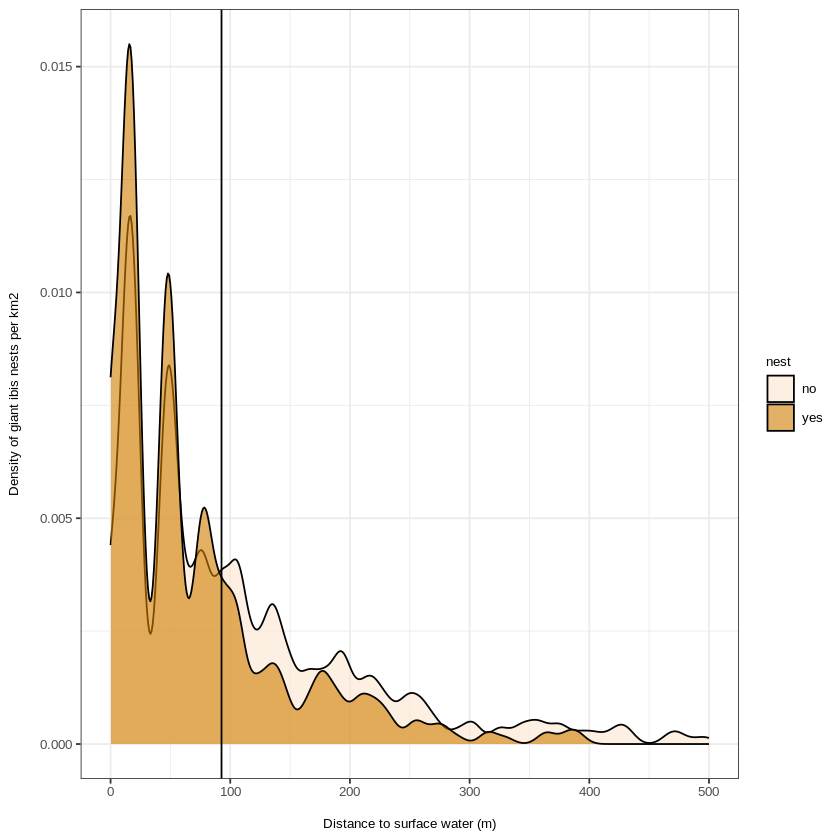

In [ ]:
#all_points$nest <- !is.na(as.character(all_points$nest))     # IIRC the system index column is a number if it is a nest, and an alpha-numeric code if a random point? If so this works.

p_ds <- ggplot(data = all_points_ds[!is.nan(all_points_ds$water_dist),], aes(x=water_dist, fill=nest)) +
    geom_density(alpha=0.6, bw = 7) +
     scale_fill_manual(values=c("#fce5cd", "#ce7e00")) +
     xlim(0, 500) + #so that the pattern can be picked out more clearly
     geom_vline(xintercept=92.7) + #add in the line where 50% of nests are within
     #geom_vline(xintercept=75, linetype='dashed') +  #add in the line where 50% of non-nests are within
     theme_bw() +  # Changing the theme to get rid of the grey background
    ylab("Density of giant ibis nests per km2\n") +  # Changing the text of the y axis label
    xlab("\nDistance to surface water (m)") + # Changing the text of the x axis label
    theme(axis.text=element_text(size=8),
          axis.title=element_text(size=8)) + #change the size of the values on the axes - easier to read
  theme(legend.text = element_text(size=8),
        legend.title = element_text(size=8))
p_ds

ggsave("ds_plot.png", width = 4, height = 4)

In [ ]:
write.csv(all_points_ds, file = "all_points_ds_export.csv")

We completed a Mann-Whitney U to determine whether these is an actual statistical difference between the nest points distance to water and the random points distance to water

Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”


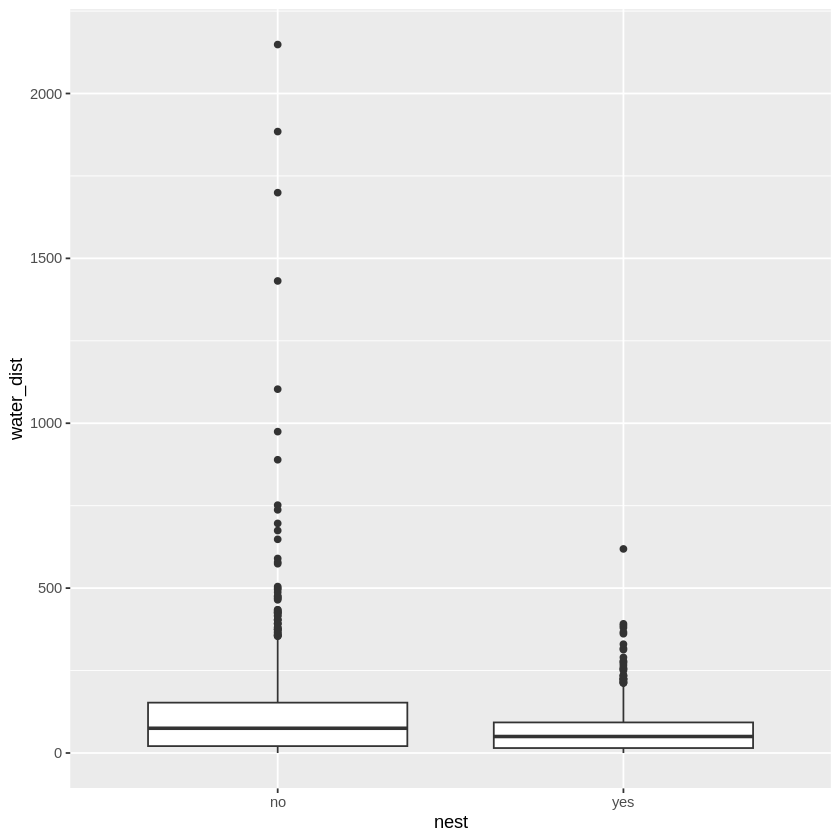

In [ ]:
ggplot(all_points_ds, aes(x = nest, y = water_dist)) +
geom_boxplot()

In [ ]:
wilcox.test(all_points_ds$water_dist~all_points_ds$nest)


	Wilcoxon rank sum test with continuity correction

data:  all_points_ds$water_dist by all_points_ds$nest
W = 237358, p-value = 2.204e-12
alternative hypothesis: true location shift is not equal to 0


Create a panel of the plots that we have

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 21 rows containing non-finite values (`stat_density()`).”


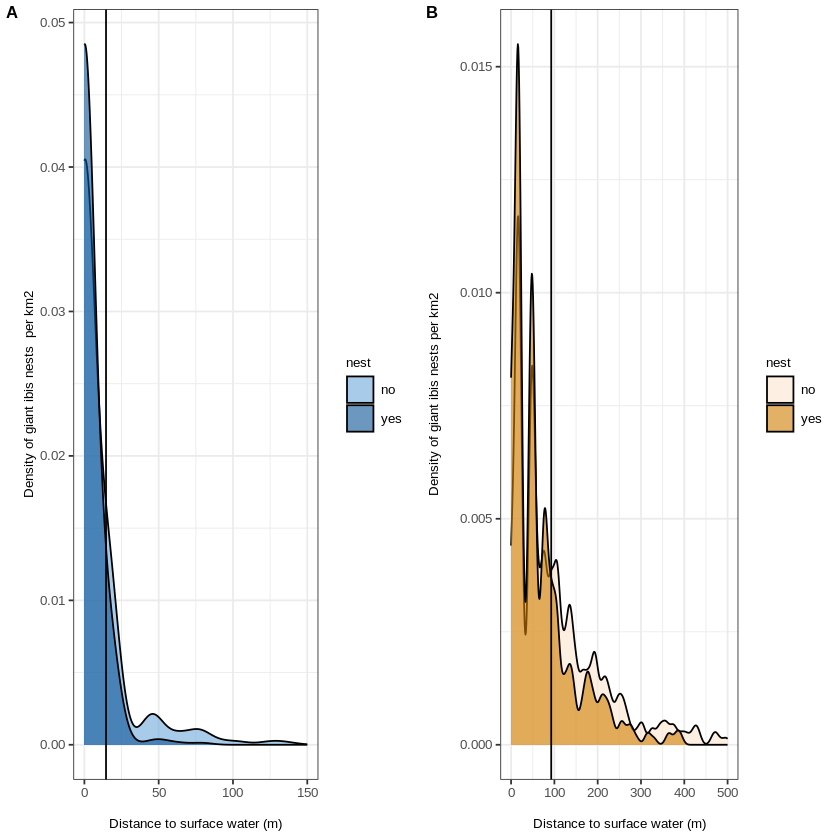

In [ ]:
install.packages("cowplot")
library(cowplot)
plot_grid(p_ws, p_ds, labels = c('A', 'B'), label_size = 10)
#plot_grid(p1, p2, labels = c('A', 'B'), label_size = 12)

ggsave("gibis_plots.png", width = 16, height = 8, units = "cm")
ggsave("gibis_plots.pdf", width = 16, height = 8, units = "cm")

**stats test for wet and dry season nests**
mann whitney u test between average distance to water between wet and dry season

In [ ]:
wilcox.test(all_points_ds$water_dist~all_points_ds$nest)


	Wilcoxon rank sum test with continuity correction

data:  all_points_ds$water_dist by all_points_ds$nest
W = 237358, p-value = 2.204e-12
alternative hypothesis: true location shift is not equal to 0


In [ ]:
ds_subset <- subset(all_points_ds, nest == "yes")
mean(ds_subset$water_dist)

[1] -Inf

In [ ]:
ws_subset <- subset(all_points, nest == "yes")
mean(ws_subset$water_dist)

[1] Inf